# Intro
Simple Program to load and check the 4STAR archive files.

For R0 of SaSa 2022 aod

# Load the defaults and imports

In [1]:
%config InlineBackend.rc = {}
import matplotlib 
import os
matplotlib.rc_file(os.path.join(os.getcwd(),'file.rc'))
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
import Sp_parameters as Sp
from load_utils import mat2py_time, toutc, load_ict
from Sp_parameters import smooth
from linfit import linfit
from path_utils import getpath
from plotting_utils import make_boxplot

In [2]:
%matplotlib notebook

In [3]:
fp =getpath('SaSa2022')

Return path named:  SaSa2022 /data/sunsat/SaSa_2022/


# load the files

In [15]:
days = ['20220630','20220706','20220708','20220711','20220712','20220712']
lvs = ['','','','','_L1','_L2']

In [4]:
days = ['20220711']
lvs = ['']

In [5]:
vv = 'R0'

In [6]:
vi = ''

In [7]:
outaod_RA = []
outaod_head_RA = []
outgas_RA = []
outgas_head_RA = []
for i,d in enumerate(days):
    try:
        print('Doing day: {}'.format(d))
        fname_aod = fp+'data_archival/AOD_ict_{vv}/SASA-4STARB-AOD_P3B_{}_{vv}{lv}.ict'.format(d,vv=vv,vi=vi,lv=lvs[i])
        tt,th = load_ict(fname_aod,return_header=True)
    except:
        print('*** Problem with day: {} *** Skipping '.format(d))
        days.pop(i)
        continue
    
    outaod_RA.append(tt)
    outaod_head_RA.append(th)
    
    #fname_gas = fp+'gas_ict/korusaq-4STAR-GASES_DC8_{}_RA.ict'.format(d)
    #ttr,thr = load_ict(fname_gas,return_header=True)
    #outgas_RA.append(ttr)
    #outgas_head_RA.append(thr)

Doing day: 20220711
('Start_UTC', 'Latitude', 'Longitude', 'GPS_Alt', 'qual_flag', 'amass_aer', 'AOD_angstrom_470_865', 'AOD_polycoef_a2', 'AOD_polycoef_a1', 'AOD_polycoef_a0', 'AOD0356', 'AOD0380', 'AOD0452', 'AOD0470', 'AOD0501', 'AOD0520', 'AOD0530', 'AOD0532', 'AOD0550', 'AOD0606', 'AOD0620', 'AOD0660', 'AOD0675', 'AOD0706', 'AOD0781', 'AOD0865', 'AOD1020', 'AOD1040', 'AOD1064', 'AOD1236', 'AOD1250', 'AOD1559', 'AOD1627', 'AOD1650', 'UNCAOD0356', 'UNCAOD0380', 'UNCAOD0452', 'UNCAOD0470', 'UNCAOD0501', 'UNCAOD0520', 'UNCAOD0530', 'UNCAOD0532', 'UNCAOD0550', 'UNCAOD0606', 'UNCAOD0620', 'UNCAOD0660', 'UNCAOD0675', 'UNCAOD0706', 'UNCAOD0781', 'UNCAOD0865', 'UNCAOD1020', 'UNCAOD1040', 'UNCAOD1064', 'UNCAOD1236', 'UNCAOD1250', 'UNCAOD1559', 'UNCAOD1627', 'UNCAOD1650')


In [8]:
len(outaod_RA)

1

In [9]:
len(days)

1

## Check the files for integrity and header info

In [22]:
for i,s in enumerate(outaod_head_RA[0]):
    for ig,g in enumerate(outaod_head_RA):
        if not s==g[i]:
            print 'no match on {vv} aod string line {}: {} and {vv} of num {}:{} '.format(i,s,ig,g[i],vv=vv)
#    for ir,r in enumerate(outgas_head_RA):
#        if not s==r[i]:
#            print 'no match on RA gas string line {}: {} and RA of num {}:{} '.format(i,s,ir,r[i])

SyntaxError: invalid syntax (<ipython-input-22-5fefbafd337a>, line 4)

In [21]:
g[i]

NameError: name 'g' is not defined

In [10]:
print('day:       AOD {vv}     GAS {vv}'.format(vv=vv))
for i,d in enumerate(days):
    try:
        print('{}: {}  {}'.format(d,len(outaod_RA[i]['Start_UTC']),len(outgas_RA[i]['Start_UTC'])))
    except:
        print('{}: missed'.format(d))

day:       AOD R0     GAS R0
20220711: missed


In [11]:
outaod_head_RA[-1]

['93, 1001\n',
 'Kristina Pistone\n',
 'NASA Ames Research Center\n',
 'Spectrometers for Sky-Scanning, Sun-Tracking Atmospheric Research - B (4STAR-B)\n',
 'SaSa 2022\n',
 '1, 1\n',
 '2022, 07, 11, 2023, 02, 16\n',
 '1\n',
 'Start_UTC, seconds, Elapsed seconds from 0 hours UT on day: 20220711\n',
 '57\n',
 '1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n',
 ' -9999.0000000, -9999.0000000, -9999.0, -9999, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999.000, -9999

In [12]:
outgas_head_RA[0]

IndexError: list index out of range

## Check the variables in header

In [13]:
nm = outaod_RA[0].dtype.names

In [14]:
nm

('Start_UTC',
 'Latitude',
 'Longitude',
 'GPS_Alt',
 'qual_flag',
 'amass_aer',
 'AOD_angstrom_470_865',
 'AOD_polycoef_a2',
 'AOD_polycoef_a1',
 'AOD_polycoef_a0',
 'AOD0356',
 'AOD0380',
 'AOD0452',
 'AOD0470',
 'AOD0501',
 'AOD0520',
 'AOD0530',
 'AOD0532',
 'AOD0550',
 'AOD0606',
 'AOD0620',
 'AOD0660',
 'AOD0675',
 'AOD0706',
 'AOD0781',
 'AOD0865',
 'AOD1020',
 'AOD1040',
 'AOD1064',
 'AOD1236',
 'AOD1250',
 'AOD1559',
 'AOD1627',
 'AOD1650',
 'UNCAOD0356',
 'UNCAOD0380',
 'UNCAOD0452',
 'UNCAOD0470',
 'UNCAOD0501',
 'UNCAOD0520',
 'UNCAOD0530',
 'UNCAOD0532',
 'UNCAOD0550',
 'UNCAOD0606',
 'UNCAOD0620',
 'UNCAOD0660',
 'UNCAOD0675',
 'UNCAOD0706',
 'UNCAOD0781',
 'UNCAOD0865',
 'UNCAOD1020',
 'UNCAOD1040',
 'UNCAOD1064',
 'UNCAOD1236',
 'UNCAOD1250',
 'UNCAOD1559',
 'UNCAOD1627',
 'UNCAOD1650')

In [15]:
wl = nm[10:-1]

In [16]:
wl = wl[0:24]

In [17]:
for a in wl:
    print(a)

AOD0356
AOD0380
AOD0452
AOD0470
AOD0501
AOD0520
AOD0530
AOD0532
AOD0550
AOD0606
AOD0620
AOD0660
AOD0675
AOD0706
AOD0781
AOD0865
AOD1020
AOD1040
AOD1064
AOD1236
AOD1250
AOD1559
AOD1627
AOD1650


# Plot the files

In [18]:
lvs[1].strip('_')

IndexError: list index out of range

<IPython.core.display.Javascript object>


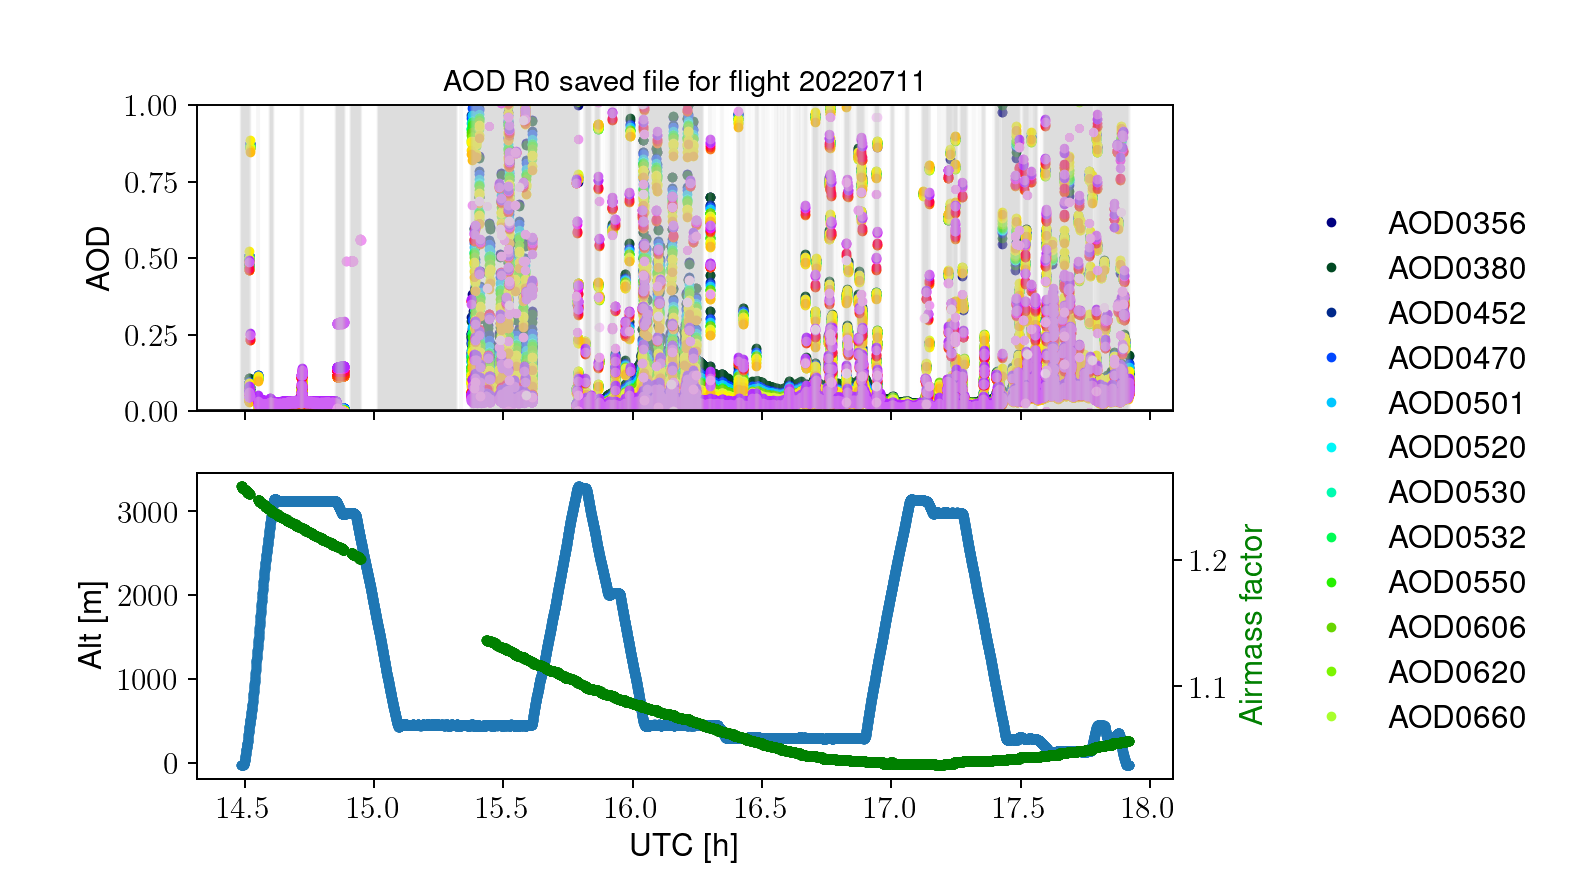

In [19]:
for i,d in enumerate(days):
    fig,ax = plt.subplots(2,sharex=True,figsize=(9,5))
    ax = ax.ravel()
    ax[0].set_title('AOD {} saved file for flight {}{lv}'.format(vv,d,lv=lvs[i].strip('_')))
    ax[0].set_prop_cycle(color=[plt.cm.gist_ncar(k) for k in np.linspace(0, 1, len(wl)+1)])
    for aod in wl:
        ax[0].plot(outaod_RA[i][nm[0]],outaod_RA[i][aod],'.',label=aod)
    try:
        for x in outaod_RA[i][nm[0]][np.where(outaod_RA[i][nm[4]]==1)[0]]:
            ax[0].axvline(x,color='#DDDDDD',alpha=0.02)
    except:
        pass
    ax[0].set_ylabel('AOD')
    ax[0].set_ylim(0,1)
    ax[0].axhline(0,color='k')
    box0 = ax[0].get_position()
    ax[0].set_position([box0.x0, box0.y0, box0.width * 0.8, box0.height])
    ax[0].legend(frameon=False,loc='center left',bbox_to_anchor=(1.1,-0.2),numpoints=1,ncol=2)
    ax[1].plot(outaod_RA[i][nm[0]],outaod_RA[i]['GPS_Alt'],'.')
    ax[1].set_ylabel('Alt [m]')
    axy = ax[1].twinx()
    axy.plot(outaod_RA[i][nm[0]],outaod_RA[i]['amass_aer'],'.g')
    axy.set_ylabel('Airmass factor',color='g')
    box = ax[1].get_position()
    ax[1].set_position([box.x0, box.y0, box0.width * 0.8, box.height])
    box = axy.get_position()
    axy.set_position([box.x0, box.y0, box0.width * 0.8, box.height])
    ax[1].set_xlabel('UTC [h]')
    plt.savefig(fp+'plots/AOD_ict_{vv}/{vv}_{}{lv}.png'.format(d,vv=vv,vi=vi,lv=lvs[i]),dpi=600,transparent=True)

## Plot the high altitude subset of the data for calibration

<IPython.core.display.Javascript object>


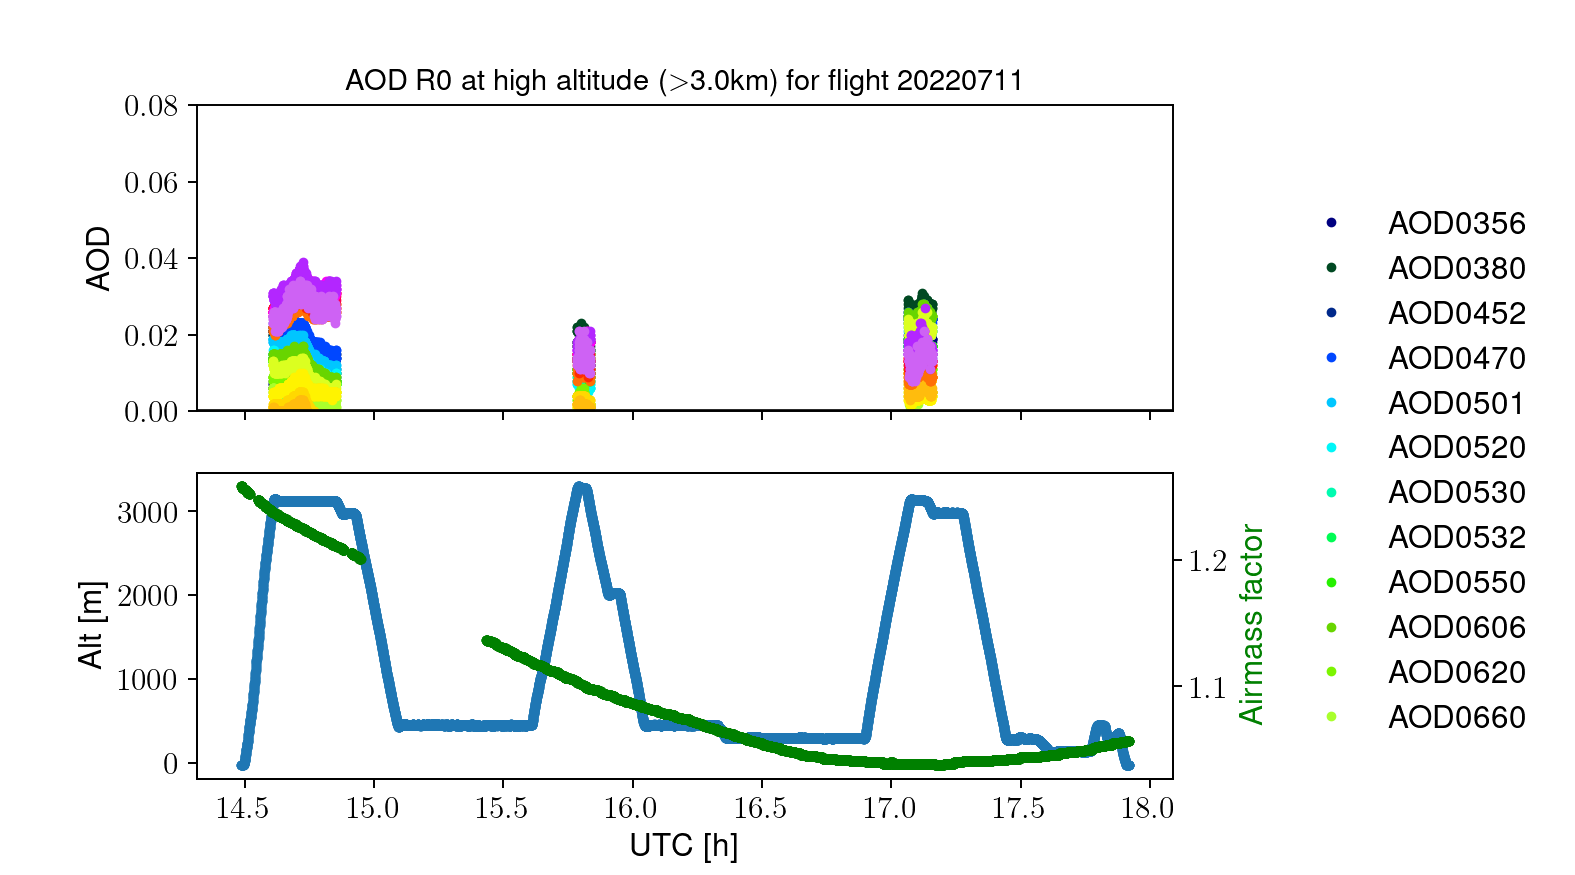

In [24]:
for i,d in enumerate(days):
    fig,ax = plt.subplots(2,sharex=True,figsize=(9,5))
    ax = ax.ravel()
    ax[0].set_title('AOD {} at high altitude ($>$3.0km) for flight {} {lv}'.format(vv,d,lv=lvs[i].strip('_')))
    ax[0].set_prop_cycle(color=[plt.cm.gist_ncar(k) for k in np.linspace(0, 1, len(wl)+1)])
    for aod in wl:
        ii = np.where((outaod_RA[i][nm[4]]==0)&(outaod_RA[i]['GPS_Alt']>3000))[0]
        ax[0].plot(outaod_RA[i][nm[0]][ii],outaod_RA[i][aod][ii],'.',label=aod)
    ax[0].set_ylabel('AOD')
    ax[0].set_ylim(0,0.08)
    ax[0].axhline(0,color='k')
    box0 = ax[0].get_position()
    ax[0].set_position([box0.x0, box0.y0, box0.width * 0.8, box0.height])
    ax[0].legend(frameon=False,loc='center left',bbox_to_anchor=(1.1,-0.2),numpoints=1,ncol=2)
    ax[1].plot(outaod_RA[i][nm[0]],outaod_RA[i]['GPS_Alt'],'.')
    ax[1].set_ylabel('Alt [m]')
    axy = ax[1].twinx()
    axy.plot(outaod_RA[i][nm[0]],outaod_RA[i]['amass_aer'],'.g')
    axy.set_ylabel('Airmass factor',color='g')
    box = ax[1].get_position()
    ax[1].set_position([box.x0, box.y0, box0.width * 0.8, box.height])
    box = axy.get_position()
    axy.set_position([box.x0, box.y0, box0.width * 0.8, box.height])
    ax[1].set_xlabel('UTC [h]')
    plt.savefig(fp+'plots/AOD_ict_{vv}/{vv}_high_alt_AOD_{}{lv}.png'.format(d,vv=vv,vi=vi,lv=lvs[i]),dpi=600,transparent=True)

In [25]:
wl[0:16]

('AOD0356',
 'AOD0380',
 'AOD0452',
 'AOD0470',
 'AOD0501',
 'AOD0520',
 'AOD0530',
 'AOD0532',
 'AOD0550',
 'AOD0606',
 'AOD0620',
 'AOD0660',
 'AOD0675',
 'AOD0706',
 'AOD0781',
 'AOD0865')

<IPython.core.display.Javascript object>


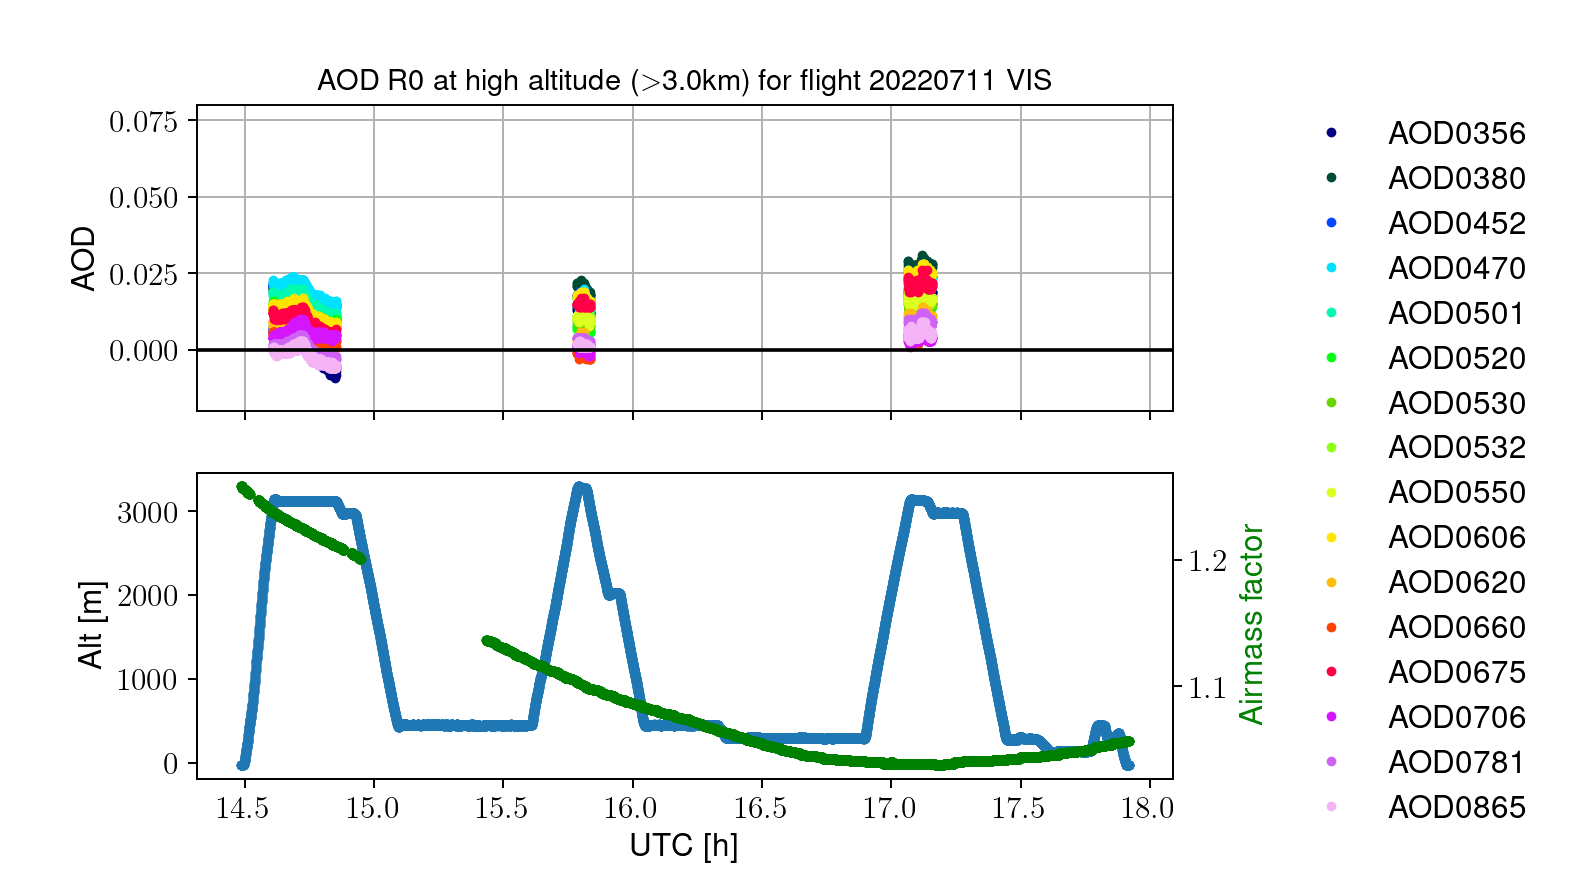

In [26]:
for i,d in enumerate(days):
    fig,ax = plt.subplots(2,sharex=True,figsize=(9,5))
    ax = ax.ravel()
    ax[0].set_title('AOD {} at high altitude ($>$3.0km) for flight {} {lv} VIS'.format(vv,d,lv=lvs[i].strip('_')))
    ax[0].set_prop_cycle(color=[plt.cm.gist_ncar(k) for k in np.linspace(0, 1, len(wl[0:16])+1)])
    for aod in wl[0:16]:
        ii = np.where((outaod_RA[i][nm[4]]==0)&(outaod_RA[i]['GPS_Alt']>3000))[0]
        ax[0].plot(outaod_RA[i][nm[0]][ii],outaod_RA[i][aod][ii],'.',label=aod)
    ax[0].set_ylabel('AOD')
    ax[0].set_ylim(-0.02,0.08)
    ax[0].grid()
    ax[0].axhline(0,color='k')
    box0 = ax[0].get_position()
    ax[0].set_position([box0.x0, box0.y0, box0.width * 0.8, box0.height])
    ax[0].legend(frameon=False,loc='center left',bbox_to_anchor=(1.1,-0.2),numpoints=1)
    ax[1].plot(outaod_RA[i][nm[0]],outaod_RA[i]['GPS_Alt'],'.')
    ax[1].set_ylabel('Alt [m]')
    axy = ax[1].twinx()
    axy.plot(outaod_RA[i][nm[0]],outaod_RA[i]['amass_aer'],'.g')
    axy.set_ylabel('Airmass factor',color='g')
    box = ax[1].get_position()
    ax[1].set_position([box.x0, box.y0, box0.width * 0.8, box.height])
    box = axy.get_position()
    axy.set_position([box.x0, box.y0, box0.width * 0.8, box.height])
    ax[1].set_xlabel('UTC [h]')
    plt.savefig(fp+'plots/AOD_ict_{vv}/{vv}_high_alt_AOD_{}{lv}_vis.png'.format(d,vv=vv,vi=vi,lv=lvs[i]),dpi=600,transparent=True)

<IPython.core.display.Javascript object>


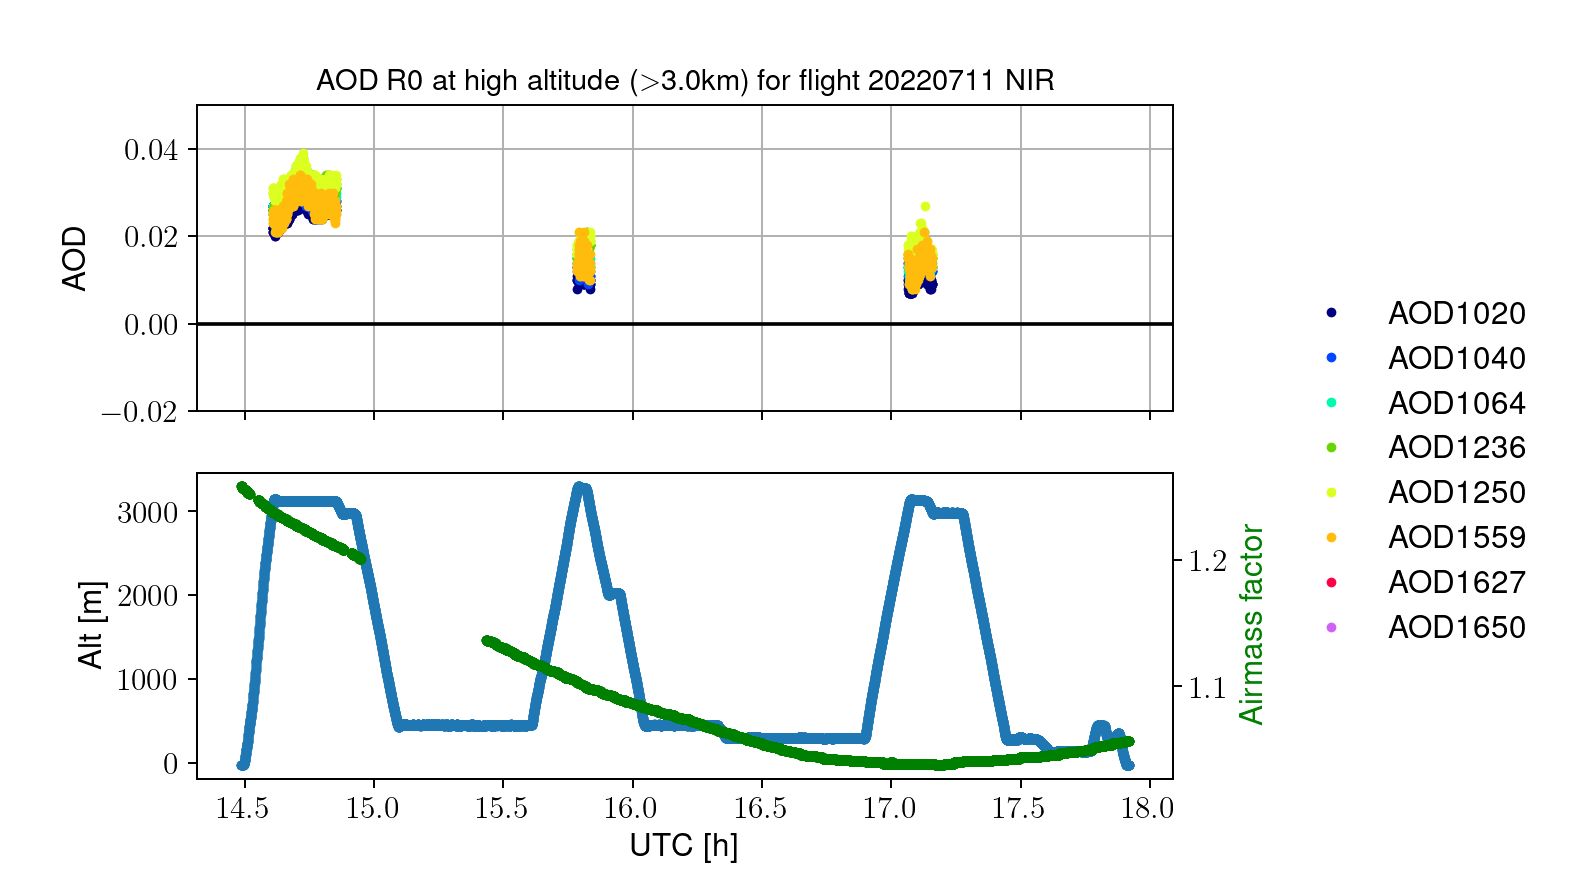

In [31]:
for i,d in enumerate(days):
    fig,ax = plt.subplots(2,sharex=True,figsize=(9,5))
    ax = ax.ravel()
    ax[0].set_title('AOD {} at high altitude ($>$3.0km) for flight {} {lv} NIR'.format(vv,d,lv=lvs[i].strip('_')))
    ax[0].set_prop_cycle(color=[plt.cm.gist_ncar(k) for k in np.linspace(0, 1, len(wl[16:])+1)])
    for aod in wl[16:]:
        ii = np.where((outaod_RA[i][nm[4]]==0)&(outaod_RA[i]['GPS_Alt']>3000))[0]
        ax[0].plot(outaod_RA[i][nm[0]][ii],outaod_RA[i][aod][ii],'.',label=aod)
    ax[0].set_ylabel('AOD')
    ax[0].set_ylim(-0.02,0.05)
    ax[0].grid()
    ax[0].axhline(0,color='k')
    box0 = ax[0].get_position()
    ax[0].set_position([box0.x0, box0.y0, box0.width * 0.8, box0.height])
    ax[0].legend(frameon=False,loc='center left',bbox_to_anchor=(1.1,-0.2),numpoints=1)
    ax[1].plot(outaod_RA[i][nm[0]],outaod_RA[i]['GPS_Alt'],'.')
    ax[1].set_ylabel('Alt [m]')
    axy = ax[1].twinx()
    axy.plot(outaod_RA[i][nm[0]],outaod_RA[i]['amass_aer'],'.g')
    axy.set_ylabel('Airmass factor',color='g')
    box = ax[1].get_position()
    ax[1].set_position([box.x0, box.y0, box0.width * 0.8, box.height])
    box = axy.get_position()
    axy.set_position([box.x0, box.y0, box0.width * 0.8, box.height])
    ax[1].set_xlabel('UTC [h]')
    plt.savefig(fp+'plots/AOD_ict_{vv}/{vv}_high_alt_AOD_{}{lv}_nir.png'.format(d,vv=vv,vi=vi,lv=lvs[i]),dpi=600,transparent=True)

## Plot the ACAOD (mid altitude 600-1800 m)

In [50]:
nm[4]

'qual_flag'

<IPython.core.display.Javascript object>


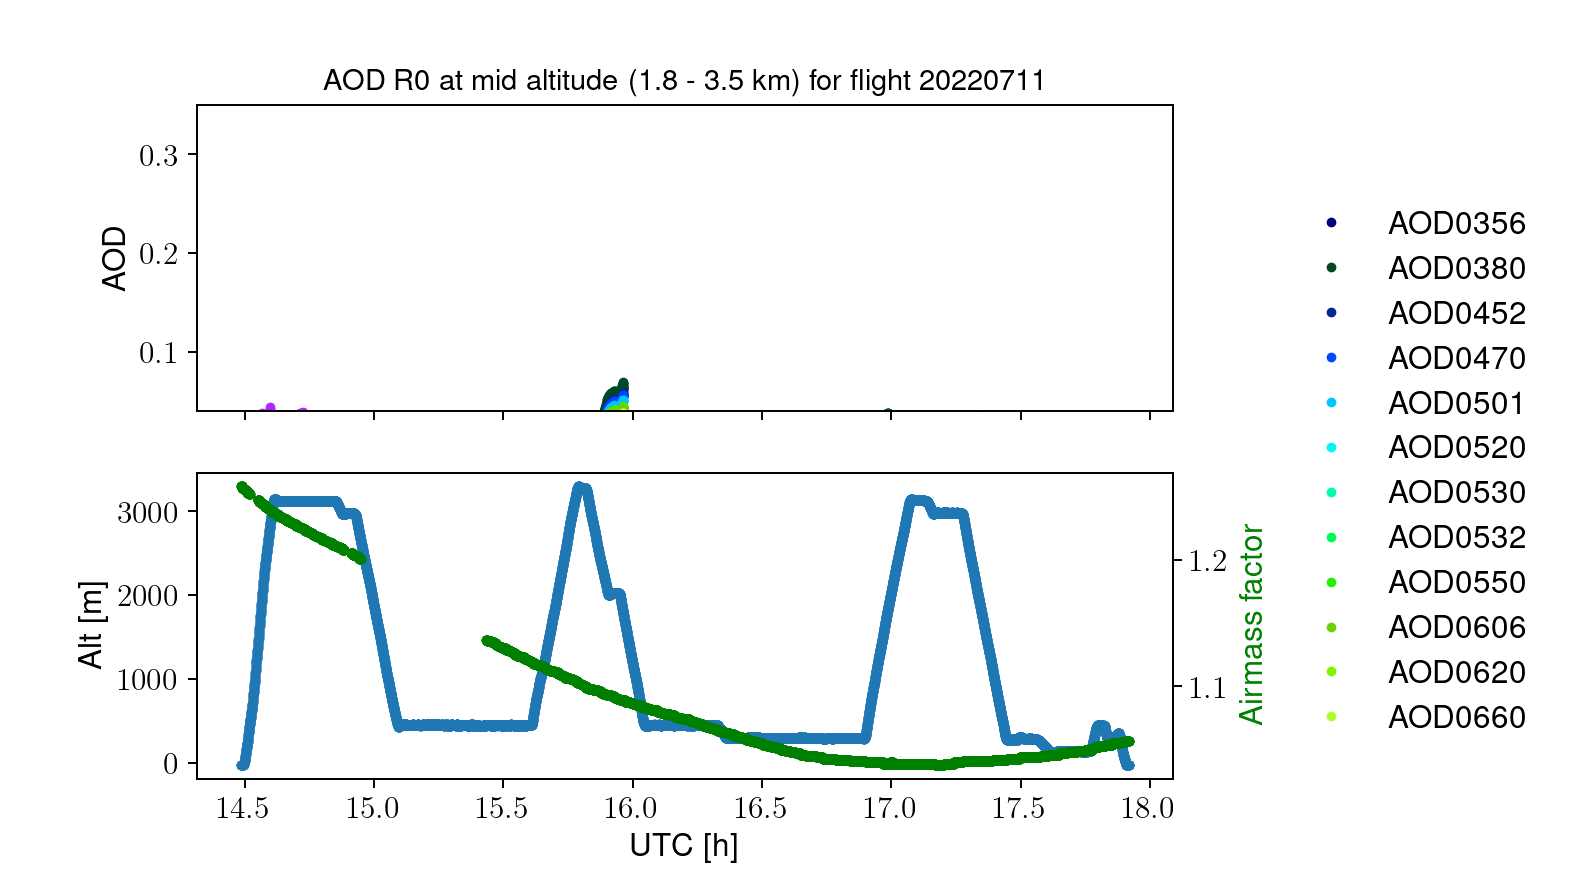

In [51]:
for i,d in enumerate(days):
    fig,ax = plt.subplots(2,sharex=True,figsize=(9,5))
    ax = ax.ravel()
    ax[0].set_title('AOD {} at mid altitude (1.8 - 3.5 km) for flight {} {lv}'.format(vv,d,lv=lvs[i].strip('_')))
    ax[0].set_prop_cycle(color=[plt.cm.gist_ncar(k) for k in np.linspace(0, 1, len(wl)+1)])
    for aod in wl:
        ii = np.where((outaod_RA[i][nm[4]]==0)&(outaod_RA[i]['GPS_Alt']>1800)&(outaod_RA[i]['GPS_Alt']<3500))[0]
        ax[0].plot(outaod_RA[i][nm[0]][ii],outaod_RA[i][aod][ii],'.',label=aod)
    ax[0].set_ylabel('AOD')
    ax[0].set_ylim(0.04,0.35)
    #ax[0].set_xlim(8.65,9.05)
    ax[0].axhline(0,color='k')
    box0 = ax[0].get_position()
    ax[0].set_position([box0.x0, box0.y0, box0.width * 0.8, box0.height])
    ax[0].legend(frameon=False,loc='center left',bbox_to_anchor=(1.1,-0.2),numpoints=1,ncol=2)
    ax[1].plot(outaod_RA[i][nm[0]],outaod_RA[i]['GPS_Alt'],'.')
    ax[1].set_ylabel('Alt [m]')
    axy = ax[1].twinx()
    axy.plot(outaod_RA[i][nm[0]],outaod_RA[i]['amass_aer'],'.g')
    axy.set_ylabel('Airmass factor',color='g')
    box = ax[1].get_position()
    ax[1].set_position([box.x0, box.y0, box0.width * 0.8, box.height])
    box = axy.get_position()
    axy.set_position([box.x0, box.y0, box0.width * 0.8, box.height])
    ax[1].set_xlabel('UTC [h]')
    #ax[1].set_xlim(8.65,9.05)
    plt.savefig(fp+'plots/AOD_ict_{vv}/{vv}_mid_alt_AOD_{}{lv}.png'.format(d,vv=vv,vi=vi,lv=lvs[i]),dpi=600,transparent=True)

## Plot the AOD with the uncertainty

In [52]:
nm[34:50]

('UNCAOD0356',
 'UNCAOD0380',
 'UNCAOD0452',
 'UNCAOD0470',
 'UNCAOD0501',
 'UNCAOD0520',
 'UNCAOD0530',
 'UNCAOD0532',
 'UNCAOD0550',
 'UNCAOD0606',
 'UNCAOD0620',
 'UNCAOD0660',
 'UNCAOD0675',
 'UNCAOD0706',
 'UNCAOD0781',
 'UNCAOD0865')

<IPython.core.display.Javascript object>


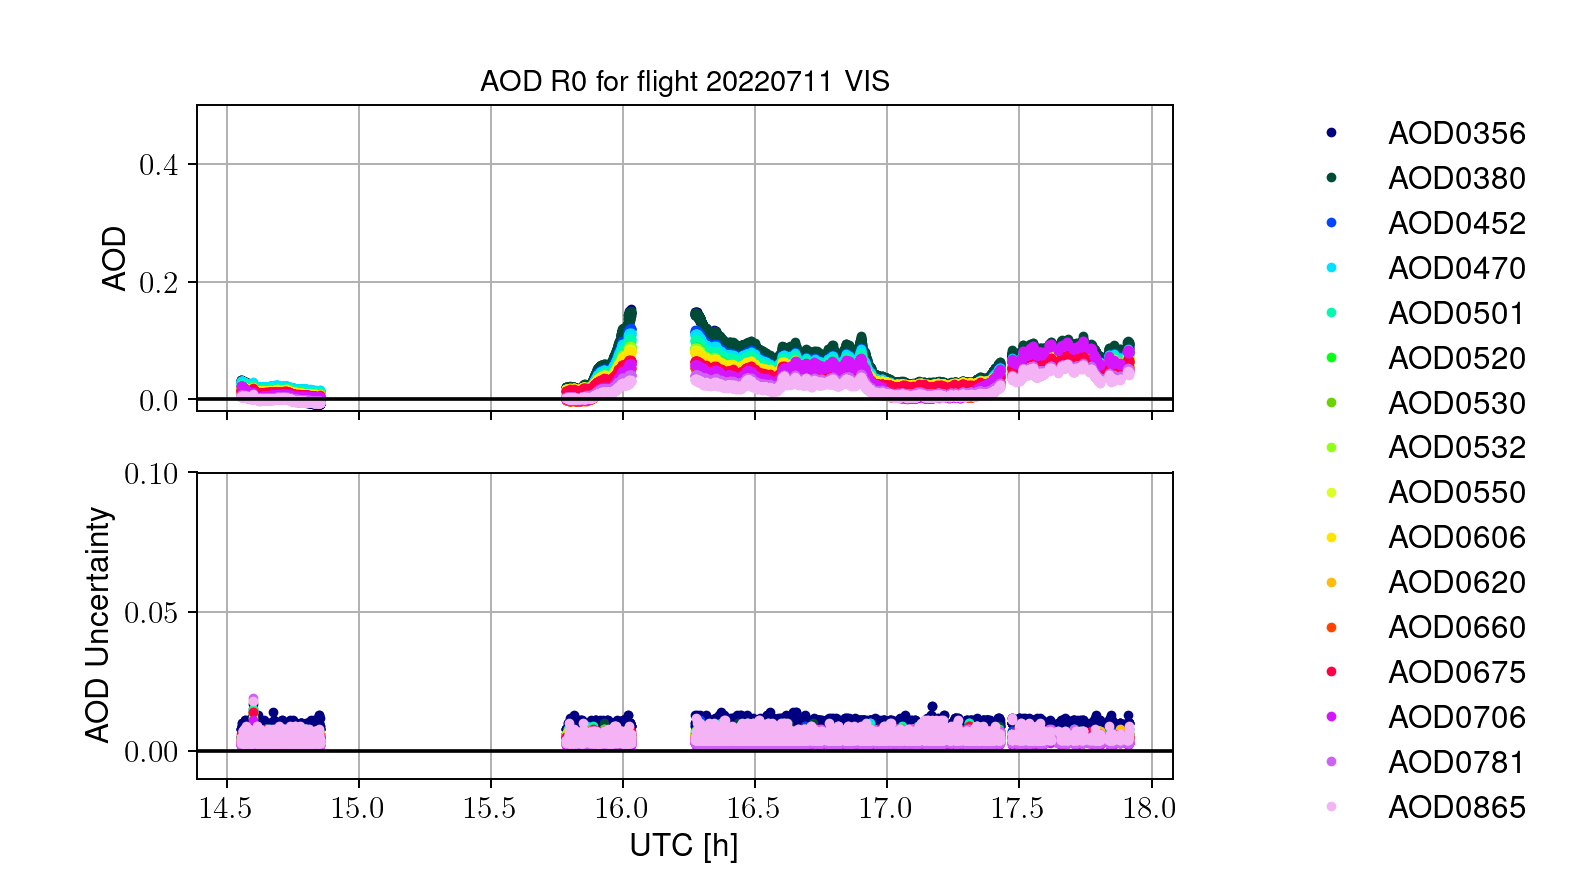

In [53]:
for i,d in enumerate(days):
    fig,ax = plt.subplots(2,sharex=True,figsize=(9,5))
    ax = ax.ravel()
    ax[0].set_title('AOD {} for flight {} {lv} VIS'.format(vv,d,lv=lvs[i].strip('_')))
    ax[0].set_prop_cycle(color=[plt.cm.gist_ncar(k) for k in np.linspace(0, 1, len(wl[0:16])+1)])
    for aod in wl[0:16]:
        ii = np.where((outaod_RA[i][nm[4]]==0))[0]
        ax[0].plot(outaod_RA[i][nm[0]][ii],outaod_RA[i][aod][ii],'.',label=aod)
    ax[0].set_ylabel('AOD')
    ax[0].set_ylim(-0.02,0.5)
    ax[0].grid()
    ax[0].axhline(0,color='k')
    box0 = ax[0].get_position()
    ax[0].set_position([box0.x0, box0.y0, box0.width * 0.8, box0.height])
    ax[0].legend(frameon=False,loc='center left',bbox_to_anchor=(1.1,-0.2),numpoints=1)
    ax[1].set_prop_cycle(color=[plt.cm.gist_ncar(k) for k in np.linspace(0, 1, len(wl[0:16])+1)])
    for unc in nm[35:51]:
        ii = np.where((outaod_RA[i][nm[4]]==0))[0]
        ax[1].plot(outaod_RA[i][nm[0]][ii],outaod_RA[i][unc][ii],'.',label=aod)
    ax[1].set_ylabel('AOD Uncertainty')
    ax[1].set_ylim(-0.01,0.1)
    ax[1].grid()
    ax[1].axhline(0,color='k')
    
    box = ax[1].get_position()
    ax[1].set_position([box.x0, box.y0, box0.width * 0.8, box.height])
    ax[1].set_xlabel('UTC [h]')
    plt.savefig(fp+'plots/AOD_ict_{vv}/{vv}_AOD_uncert_{vi}_{}{lv}_vis.png'.format(d,vv=vv,vi=vi,lv=lvs[i]),dpi=600,transparent=True)

In [54]:
nm[50:]

('UNCAOD1020',
 'UNCAOD1040',
 'UNCAOD1064',
 'UNCAOD1236',
 'UNCAOD1250',
 'UNCAOD1559',
 'UNCAOD1627',
 'UNCAOD1650')

<IPython.core.display.Javascript object>


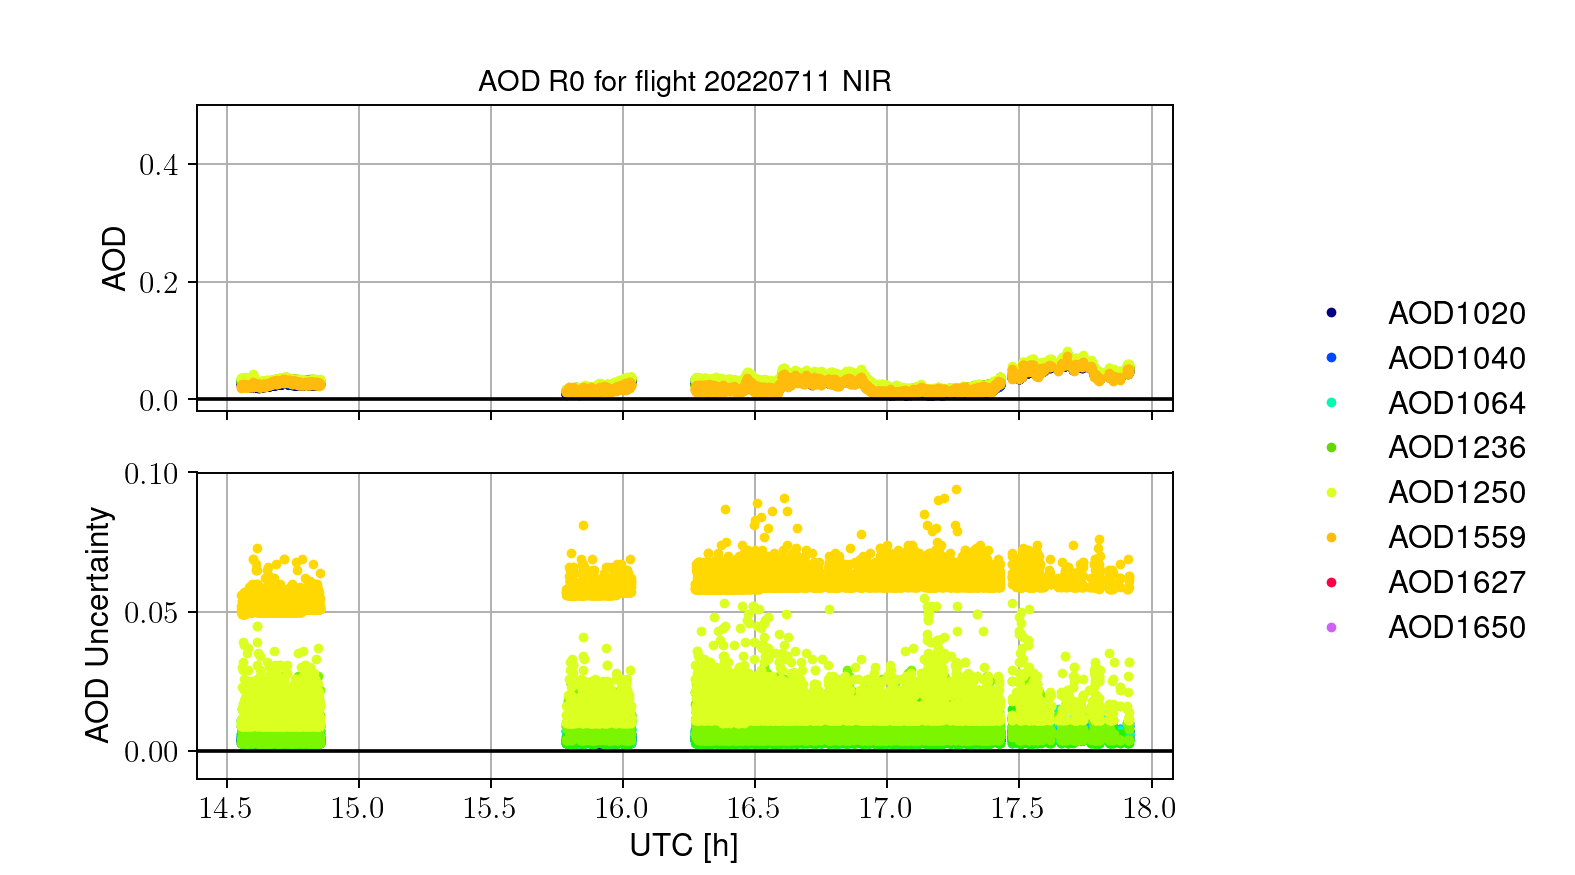

In [55]:
for i,d in enumerate(days):
    fig,ax = plt.subplots(2,sharex=True,figsize=(9,5))
    ax = ax.ravel()
    ax[0].set_title('AOD {} for flight {} {lv} NIR'.format(vv,d,lv=lvs[i].strip('_')))
    ax[0].set_prop_cycle(color=[plt.cm.gist_ncar(k) for k in np.linspace(0, 1, len(wl[16:])+1)])
    for aod in wl[16:]:
        ii = np.where((outaod_RA[i][nm[4]]==0))[0]
        ax[0].plot(outaod_RA[i][nm[0]][ii],outaod_RA[i][aod][ii],'.',label=aod)
    ax[0].set_ylabel('AOD')
    ax[0].set_ylim(-0.02,0.5)
    ax[0].grid()
    ax[0].axhline(0,color='k')
    box0 = ax[0].get_position()
    ax[0].set_position([box0.x0, box0.y0, box0.width * 0.8, box0.height])
    ax[0].legend(frameon=False,loc='center left',bbox_to_anchor=(1.1,-0.2),numpoints=1)
    ax[1].set_prop_cycle(color=[plt.cm.gist_ncar(k) for k in np.linspace(0, 1, len(nm[46:])+1)])
    for unc in nm[50:]:
        ii = np.where((outaod_RA[i][nm[4]]==0))[0]
        ax[1].plot(outaod_RA[i][nm[0]][ii],outaod_RA[i][unc][ii],'.',label=aod)
    ax[1].set_ylabel('AOD Uncertainty')
    ax[1].set_ylim(-0.01,0.1)
    ax[1].grid()
    ax[1].axhline(0,color='k')
    
    box = ax[1].get_position()
    ax[1].set_position([box.x0, box.y0, box0.width * 0.8, box.height])
    ax[1].set_xlabel('UTC [h]')
    plt.savefig(fp+'plots/AOD_ict_{vv}/{vv}_AOD_uncert_{vi}_{}{lv}_nir.png'.format(d,vv=vv,vi=vi,lv=lvs[i]),dpi=600,transparent=True)

In [56]:
outaod_RA[i][unc][ii]

array([0.051, 0.052, 0.056, ..., 0.059, 0.063, 0.063])

In [57]:
nm[4]

'qual_flag'

<IPython.core.display.Javascript object>


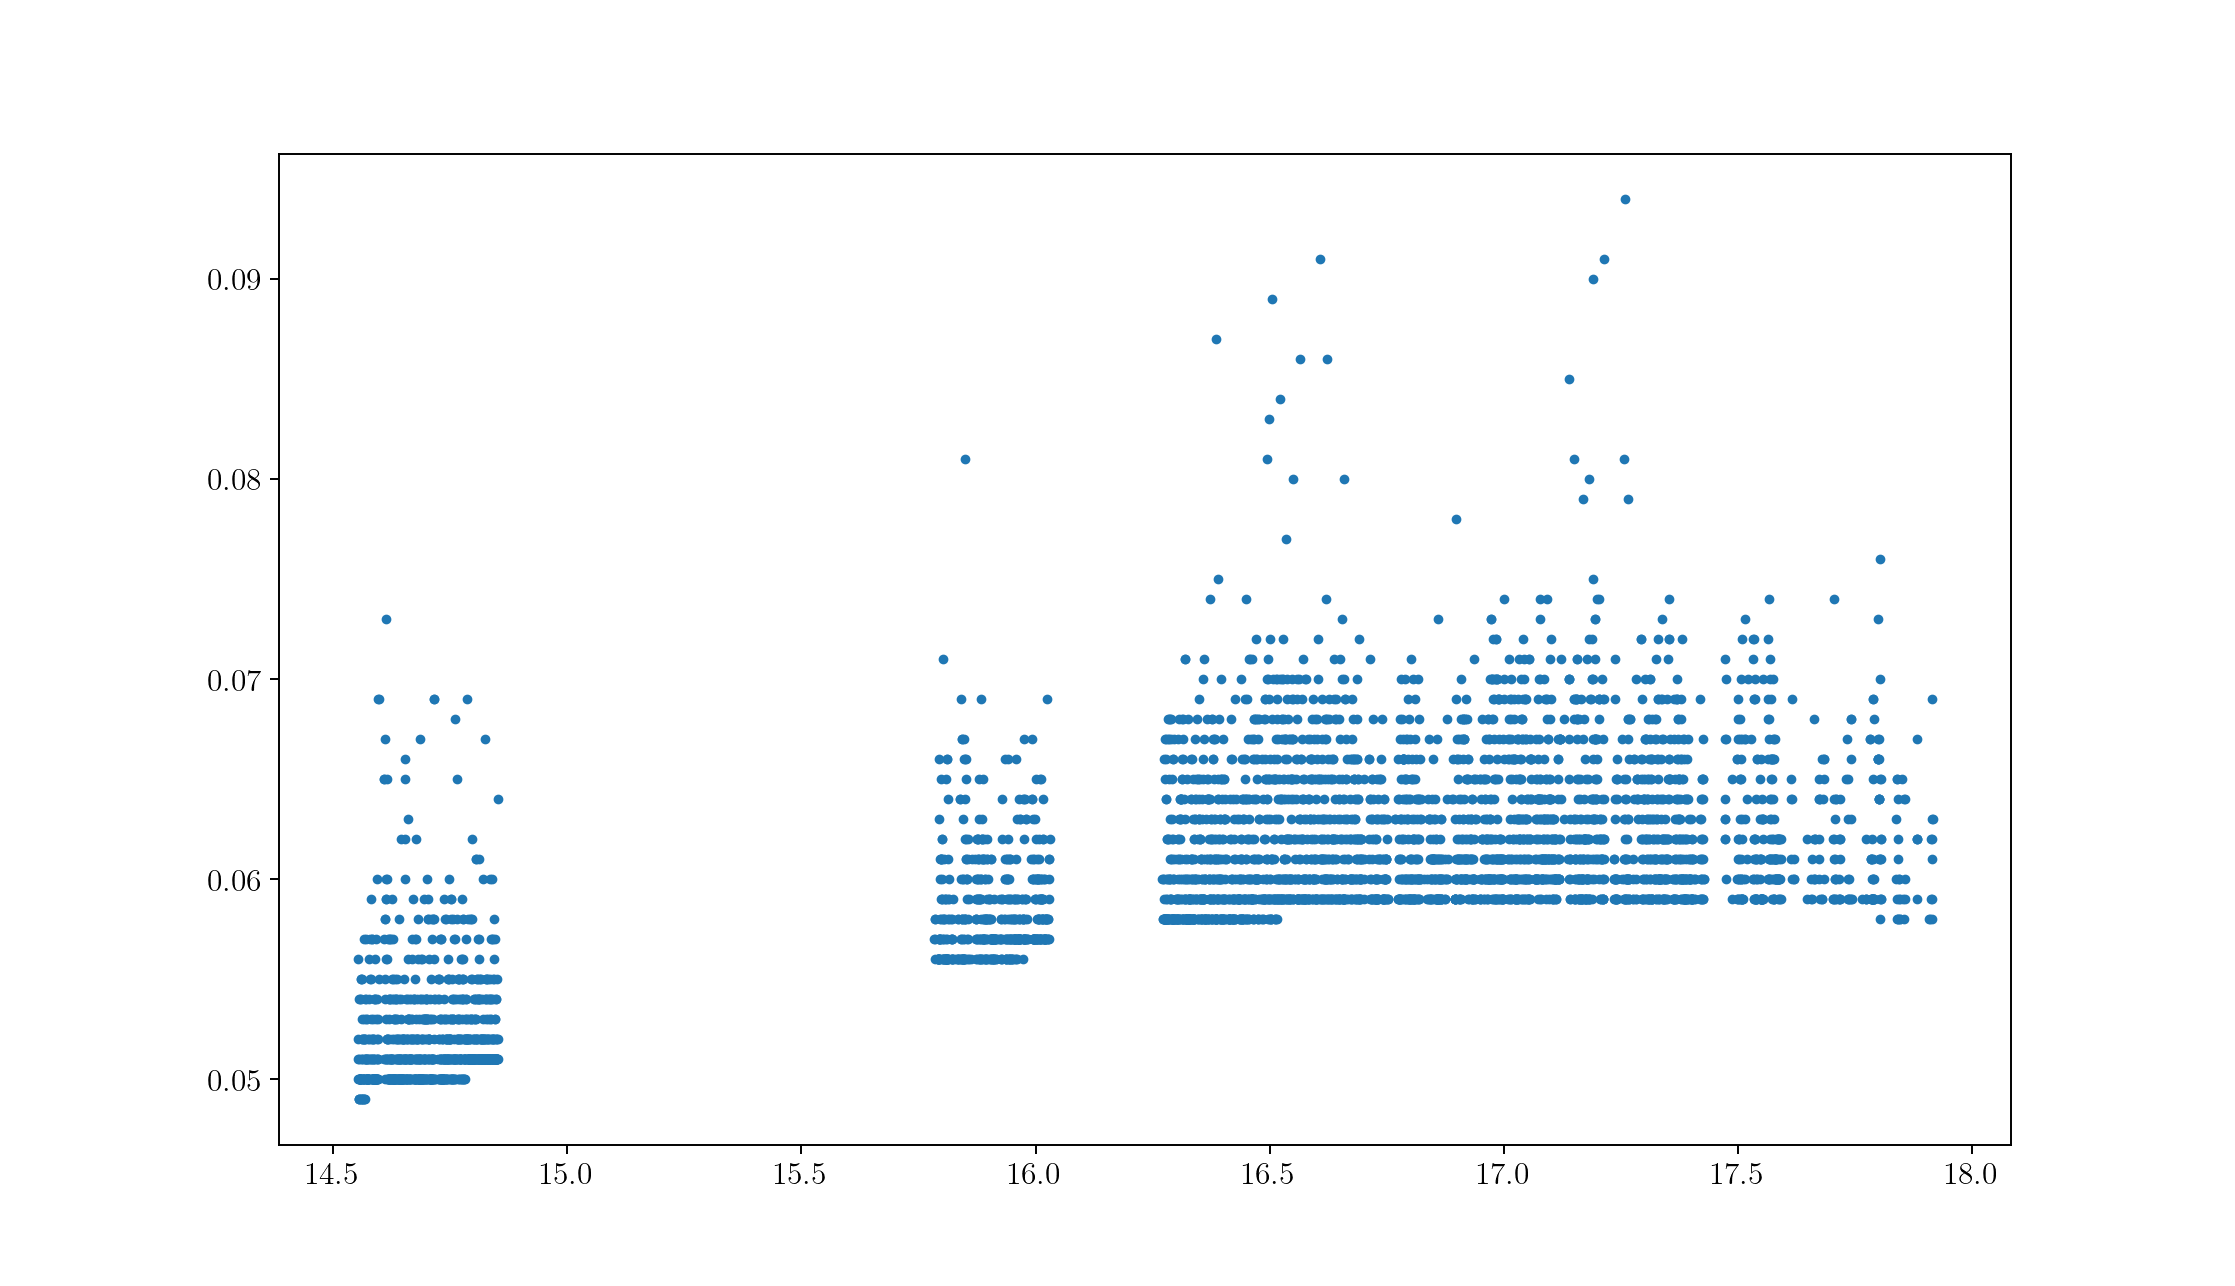

In [58]:
plt.figure()
ii = np.where((outaod_RA[0][nm[4]]==0))[0]
plt.plot(outaod_RA[0][nm[0]][ii],outaod_RA[i][unc][ii],'.')

## Plot spectral aod figures for high altitude

In [59]:
wv = [float(v[3:]) for v in wl]

In [60]:
wv

[356.0,
 380.0,
 452.0,
 470.0,
 501.0,
 520.0,
 530.0,
 532.0,
 550.0,
 606.0,
 620.0,
 660.0,
 675.0,
 706.0,
 781.0,
 865.0,
 1020.0,
 1040.0,
 1064.0,
 1236.0,
 1250.0,
 1559.0,
 1627.0,
 1650.0]

<IPython.core.display.Javascript object>


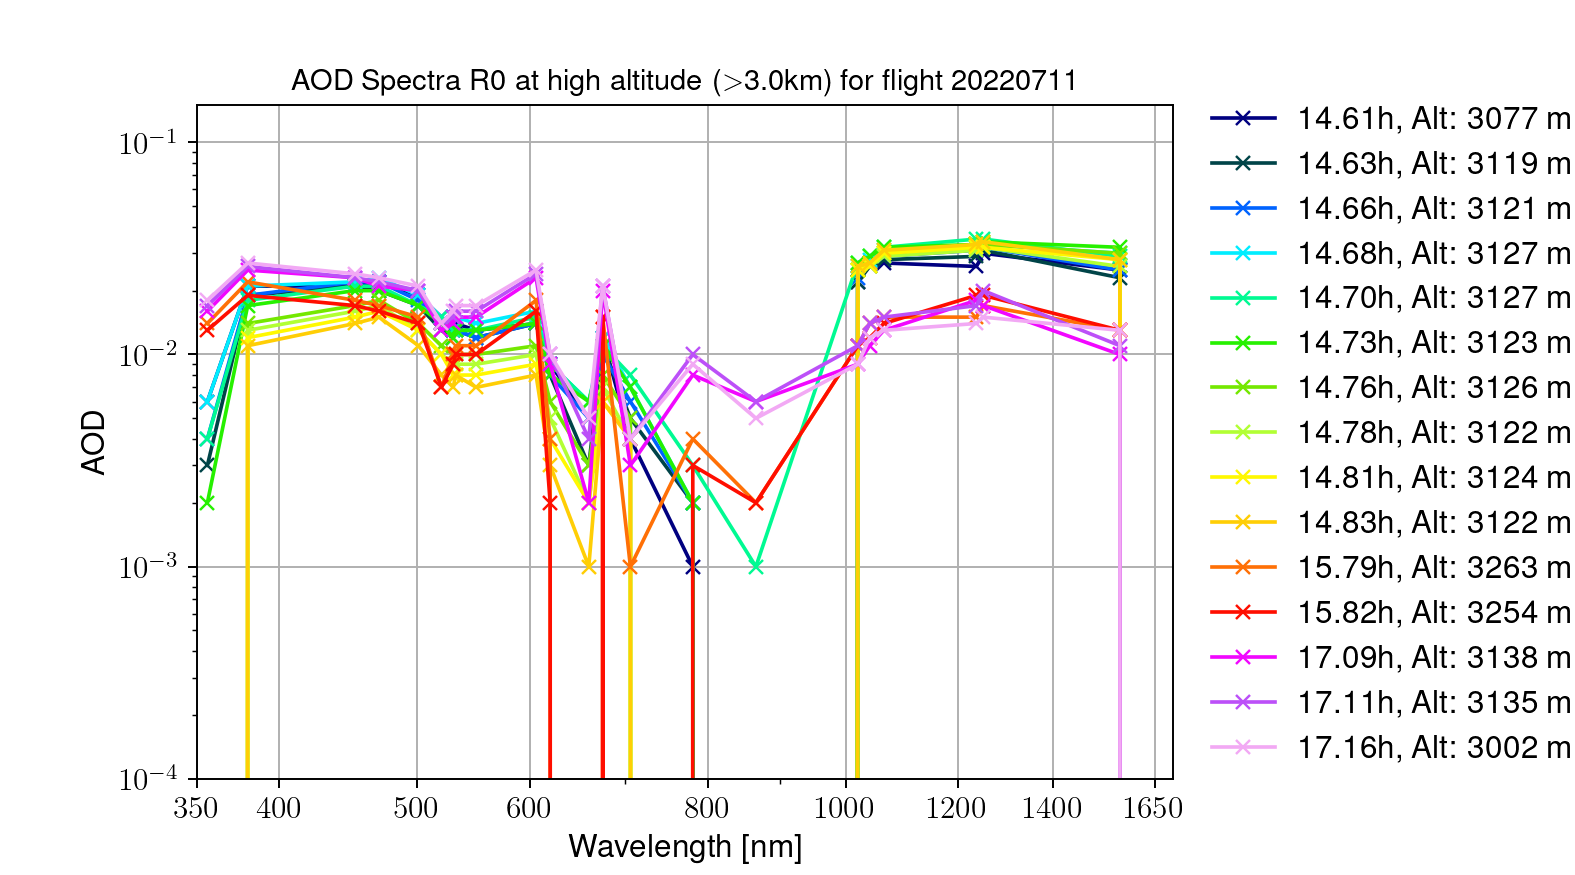

In [61]:
for i,d in enumerate(days):
    fig,ax = plt.subplots(1,sharex=True,figsize=(9,5))
    #ax = ax.ravel()
    ax.set_title('AOD Spectra {} at high altitude ($>$3.0km) for flight {}{lv}'.format(vv,d,lv=lvs[i].strip('_')))
    ii = np.where((outaod_RA[i][nm[4]]==0)&(outaod_RA[i]['GPS_Alt']>3000))[0]
    if not any(ii): continue
    js = np.linspace(0,len(ii)-1,15).astype(int)
    ax.set_prop_cycle(color=[plt.cm.gist_ncar(k) for k in np.linspace(0, 1, 16)])
    for j in js:
        sp = np.array([outaod_RA[i][n][ii[j]] for n in wl])
        fo = {'u':outaod_RA[i]['Start_UTC'][ii[j]],'a':outaod_RA[i]['GPS_Alt'][ii[j]]}
        if not np.isfinite(sp).any(): continue
        if any(sp>0.0):
            ax.plot(wv,sp,'x-',label='{u:5.2f}h, Alt: {a:5.0f} m'.format(**fo))
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_ylabel('AOD')
    ax.set_ylim(0.0001,0.15)
    ax.set_xlabel('Wavelength [nm]')
    ax.set_xlim(350.0,1700.0)
    plt.xticks([350,400,500,600,800,1000,1200,1400,1650])
    
    ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax.legend(frameon=False,loc='upper left',bbox_to_anchor=(1.01,1.04),numpoints=1)
    ax.grid()
    plt.savefig(fp+'plots/AOD_ict_{vv}//{vv}_high_alt_AOD_spectra_{vi}_{}{lv}.png'.format(d,vv=vv,vi=vi,lv=lvs[i]),dpi=600,transparent=True)

## Plot AOD spectra with polyfit

<IPython.core.display.Javascript object>


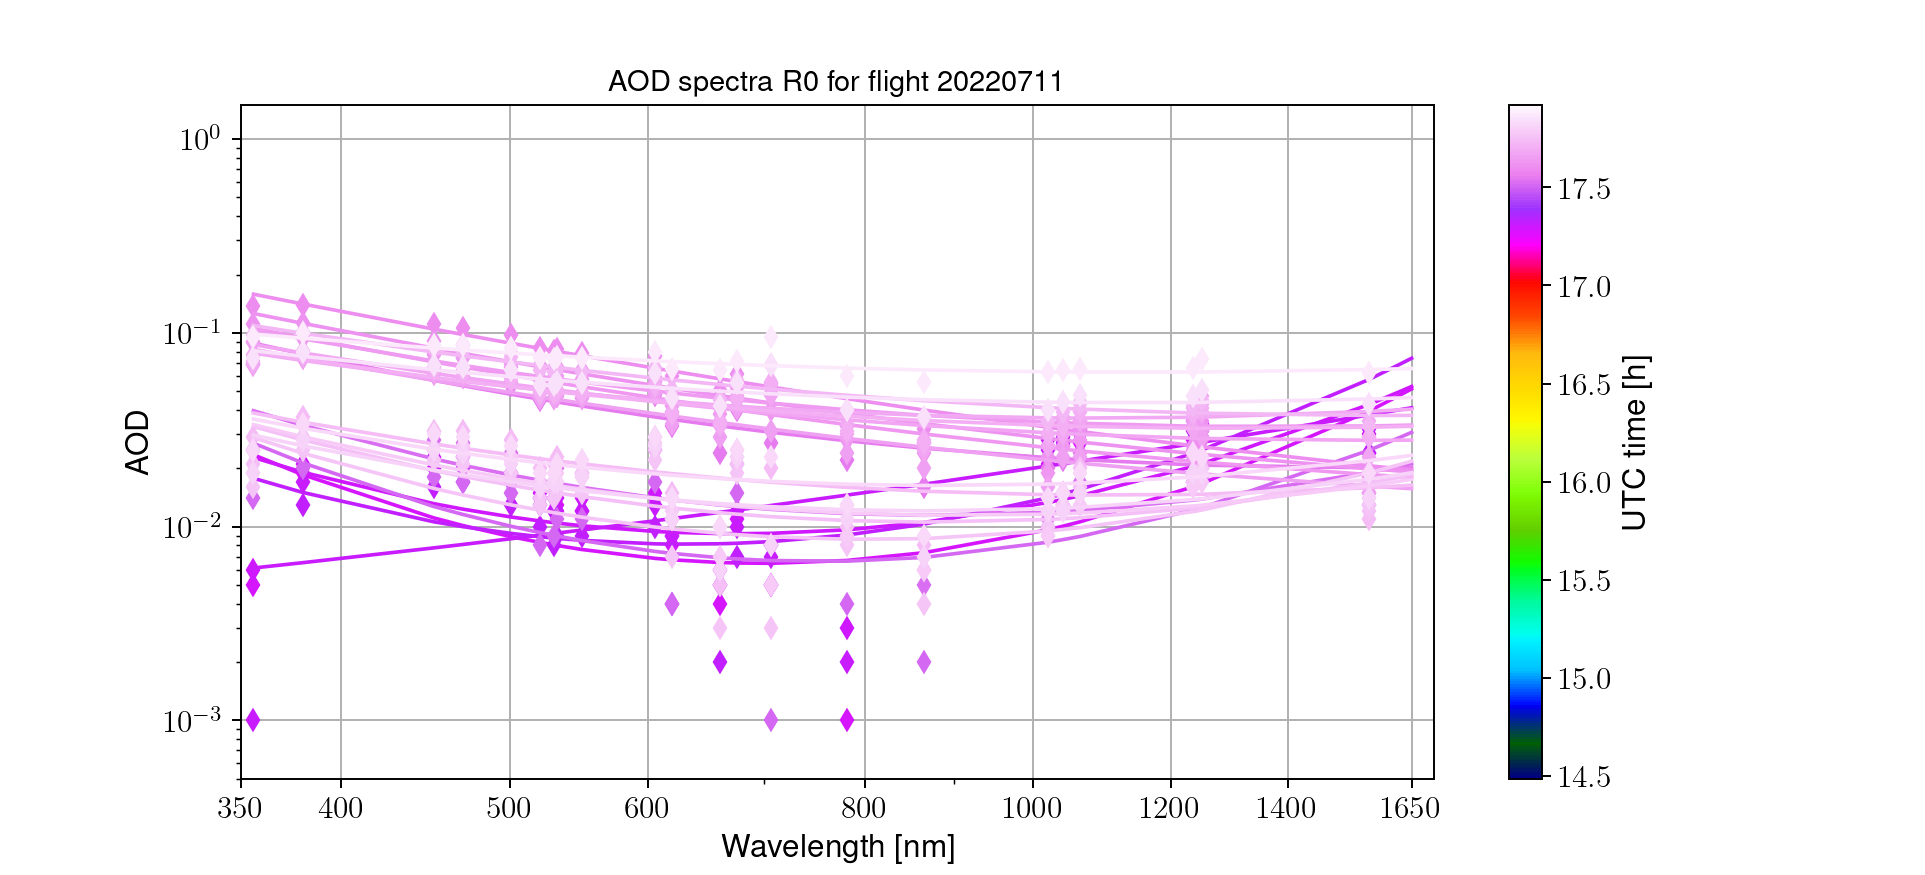

In [62]:
for i,d in enumerate(days):
    fig,ax = plt.subplots(1,sharex=True,figsize=(11,5))
    ax.set_title('AOD spectra {} for flight {} {lv}'.format(vv,d,lv=lvs[i].strip('_')))
    #bins = len(outaod_RA[i]['Start_UTC'])/10
    cc = plt.cm.gist_ncar(outaod_RA[i]['Start_UTC']/outaod_RA[i]['Start_UTC'].max())
    cmapname = 'gist_ncar'

    ard =  outaod_RA[i]
    asp = np.array([ard['AOD0356'],ard['AOD0380'],ard['AOD0452'],ard['AOD0470'],ard['AOD0501'],ard['AOD0520'],ard['AOD0530'],
                    ard['AOD0532'],ard['AOD0550'],ard['AOD0606'],ard['AOD0620'],ard['AOD0660'],ard['AOD0675'],ard['AOD0706'],
                    ard['AOD0781'],ard['AOD0865'],ard['AOD1020'],ard['AOD1040'],ard['AOD1064'],ard['AOD1236'],ard['AOD1250'],
                    ard['AOD1559'],ard['AOD1627'],ard['AOD1650']])
    qa = outaod_RA[i]['qual_flag']==0
    ax.plot([350],[1],'.',alpha=0.0)
    jj = 0
    for j,f in enumerate(ard['Start_UTC']):
        #if not np.isfinite(asp[:,j]).any(): continue
        if qa[j]: 
            jj = jj+1
            if jj%200>0: continue
            ax.plot(wv,asp[:,j],marker='d',linestyle='None',color=cc[j,:])
            ax.plot(wv,np.exp(np.polyval([ard['AOD_polycoef_a2'][j],ard['AOD_polycoef_a1'][j],ard['AOD_polycoef_a0'][j]],
                                         np.log(wv))),'-',c=cc[j,:])
    ax.set_ylim(0.0005,1.5)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_ylabel('AOD')
    ax.set_ylim(0.0005,1.5)
    ax.set_xlabel('Wavelength [nm]')
    ax.set_xlim(380.0,1700.0)
    plt.xticks([350,400,500,600,800,1000,1200,1400,1650])

    ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    ax.grid()
    plt.xticks([350,400,500,600,800,1000,1200,1400,1650])

    scalarmap = plt.cm.ScalarMappable(cmap=plt.cm.get_cmap(cmapname))
    scalarmap.set_array(outaod_RA[i]['Start_UTC'][:0:-1])
    cba = plt.colorbar(scalarmap)
    cba.set_label('UTC time [h]')
    plt.savefig(fp+'plots/AOD_ict_{vv}//{vv}_AOD_spectra_polyfit_{vi}_{}{lv}.png'.format(d,vv=vv,vi=vi,lv=lvs[i]),dpi=600,transparent=True)

## Plotting of AOD per altitude and latitude

<IPython.core.display.Javascript object>


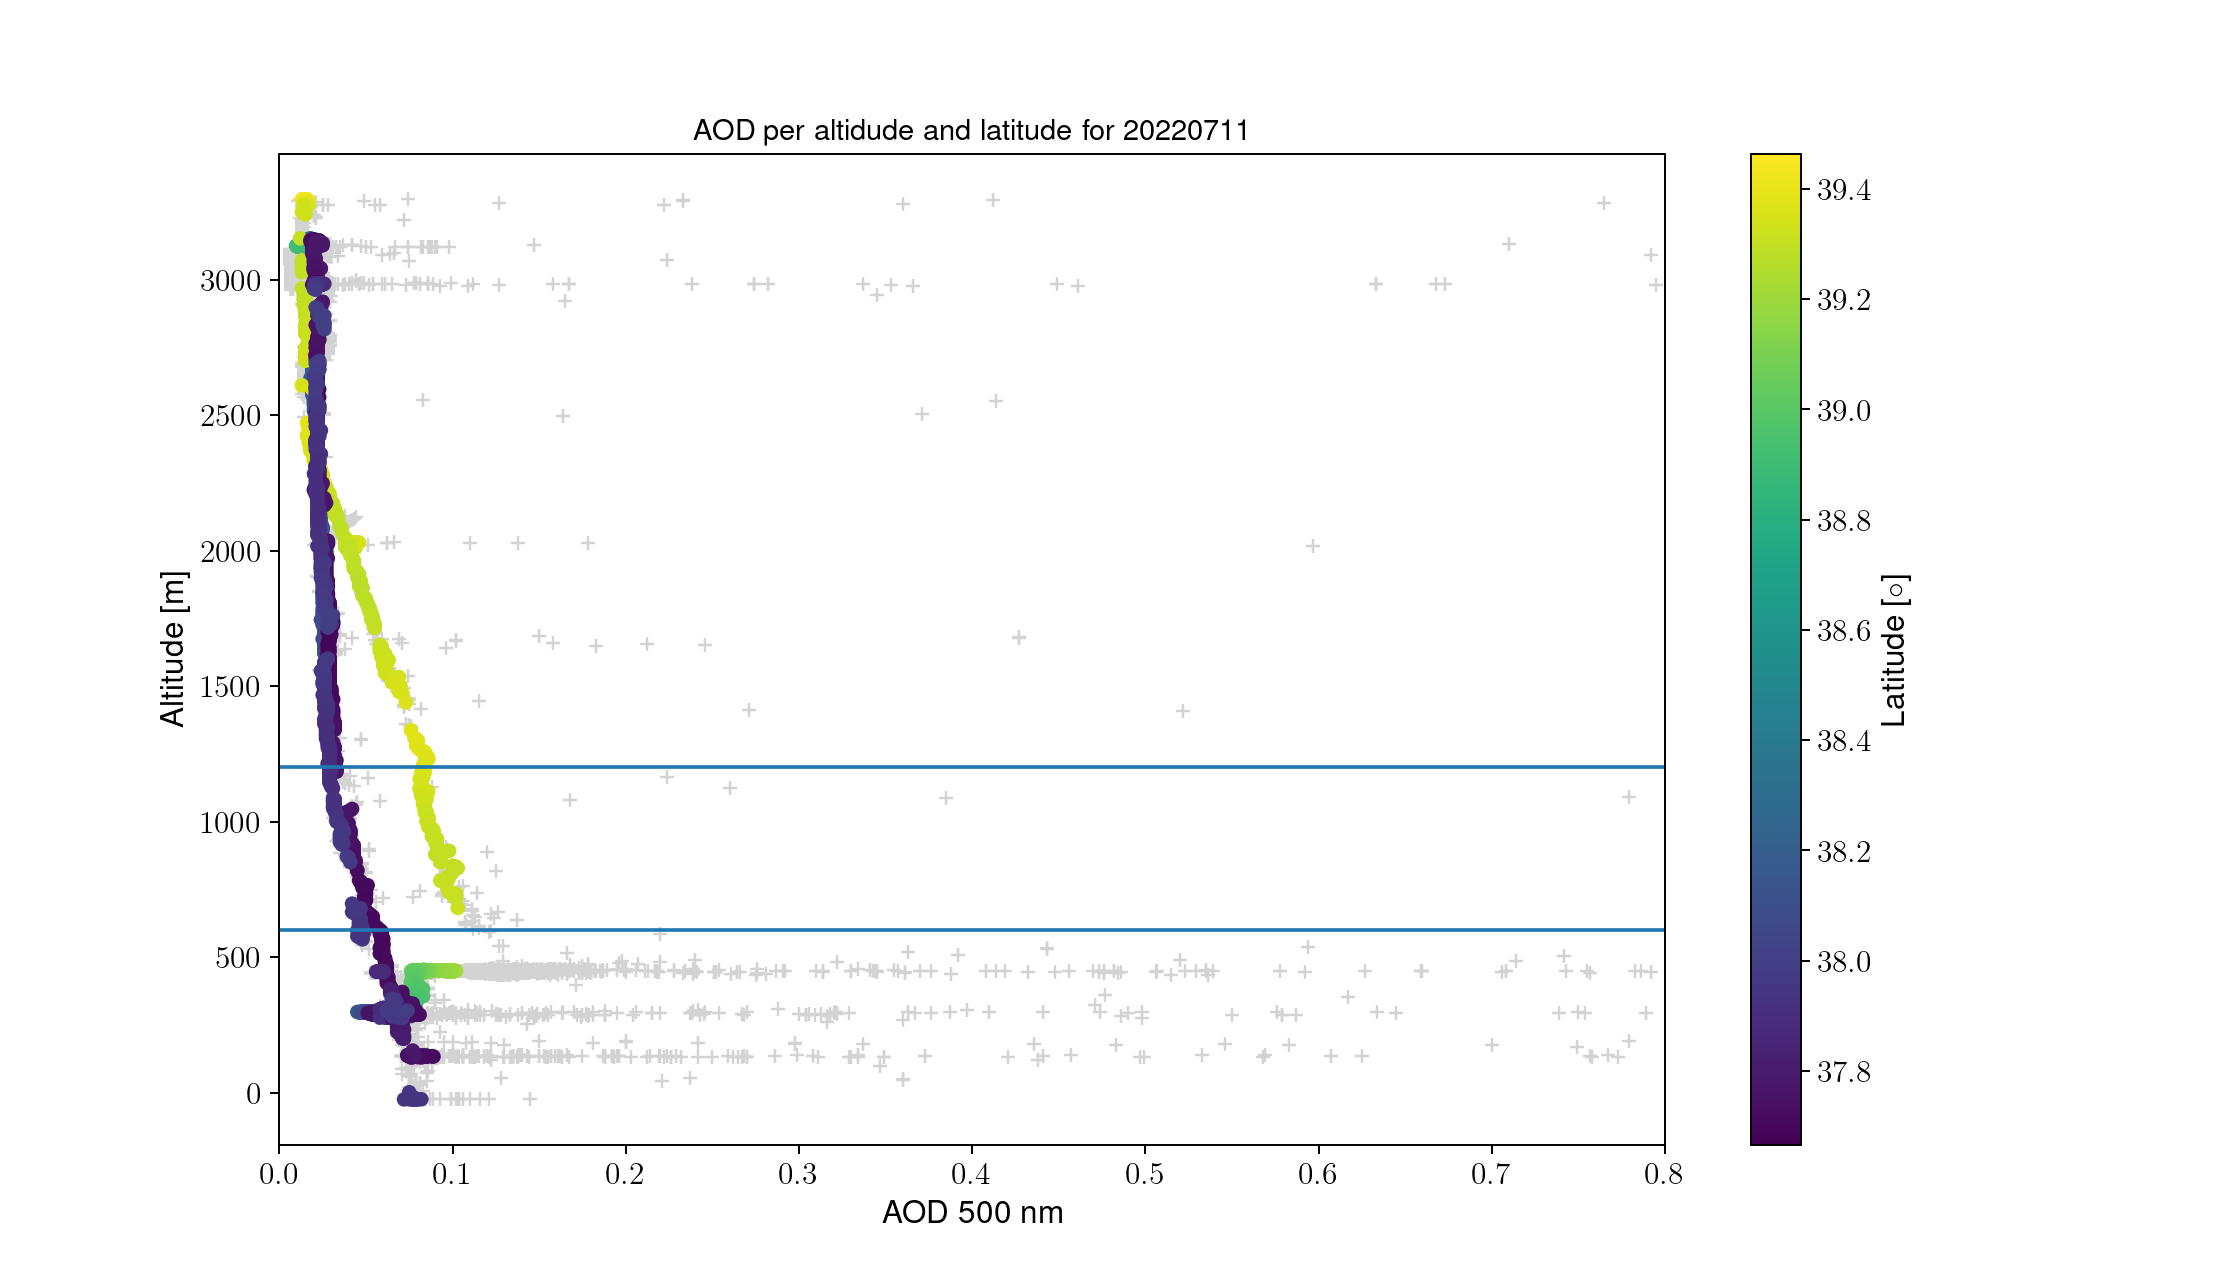

In [63]:
for i,d in enumerate(days):
    plt.figure()
    #d = days[15]
    plt.plot(outaod_RA[i]['AOD0501'],outaod_RA[i]['GPS_Alt'],'+',color='lightgrey',zorder=0)
    b = plt.scatter(outaod_RA[i]['AOD0501'][outaod_RA[i]['qual_flag']==0],outaod_RA[i]['GPS_Alt'][outaod_RA[i]['qual_flag']==0],
                marker='o',edgecolor='None',c=outaod_RA[i]['Latitude'][outaod_RA[i]['qual_flag']==0],cmap='viridis')
    plt.axhline(600)
    plt.axhline(1200)
    plt.xlim(0,0.8)
    plt.xlabel('AOD 500 nm')
    plt.ylabel('Altitude [m]')
    plt.title('AOD per altidude and latitude for {}{lv}'.format(d,lv=lvs[i].strip('_')))
    try:
        cb = plt.colorbar(b)
        cb.set_label('Latitude [$\\circ$]')
    except:
        pass
    plt.savefig(fp+'plots/AOD_ict_{vv}/{vv}_{}{lv}_aod_alt_lat.png'.format(d,vv=vv,vi=vi,lv=lvs[i]),dpi=600,transparent=True)

## Make plots of angstrom exponent

In [64]:
wls = [0.38,0.452,0.501,0.520,0.532,0.55,0.606,0.620,0.675,0.781,0.865,1.02,1.04,1.064,1.236,1.559]

In [65]:
wls = np.array(wv)/1000.0

In [66]:
wl[4]

'AOD0501'

<IPython.core.display.Javascript object>


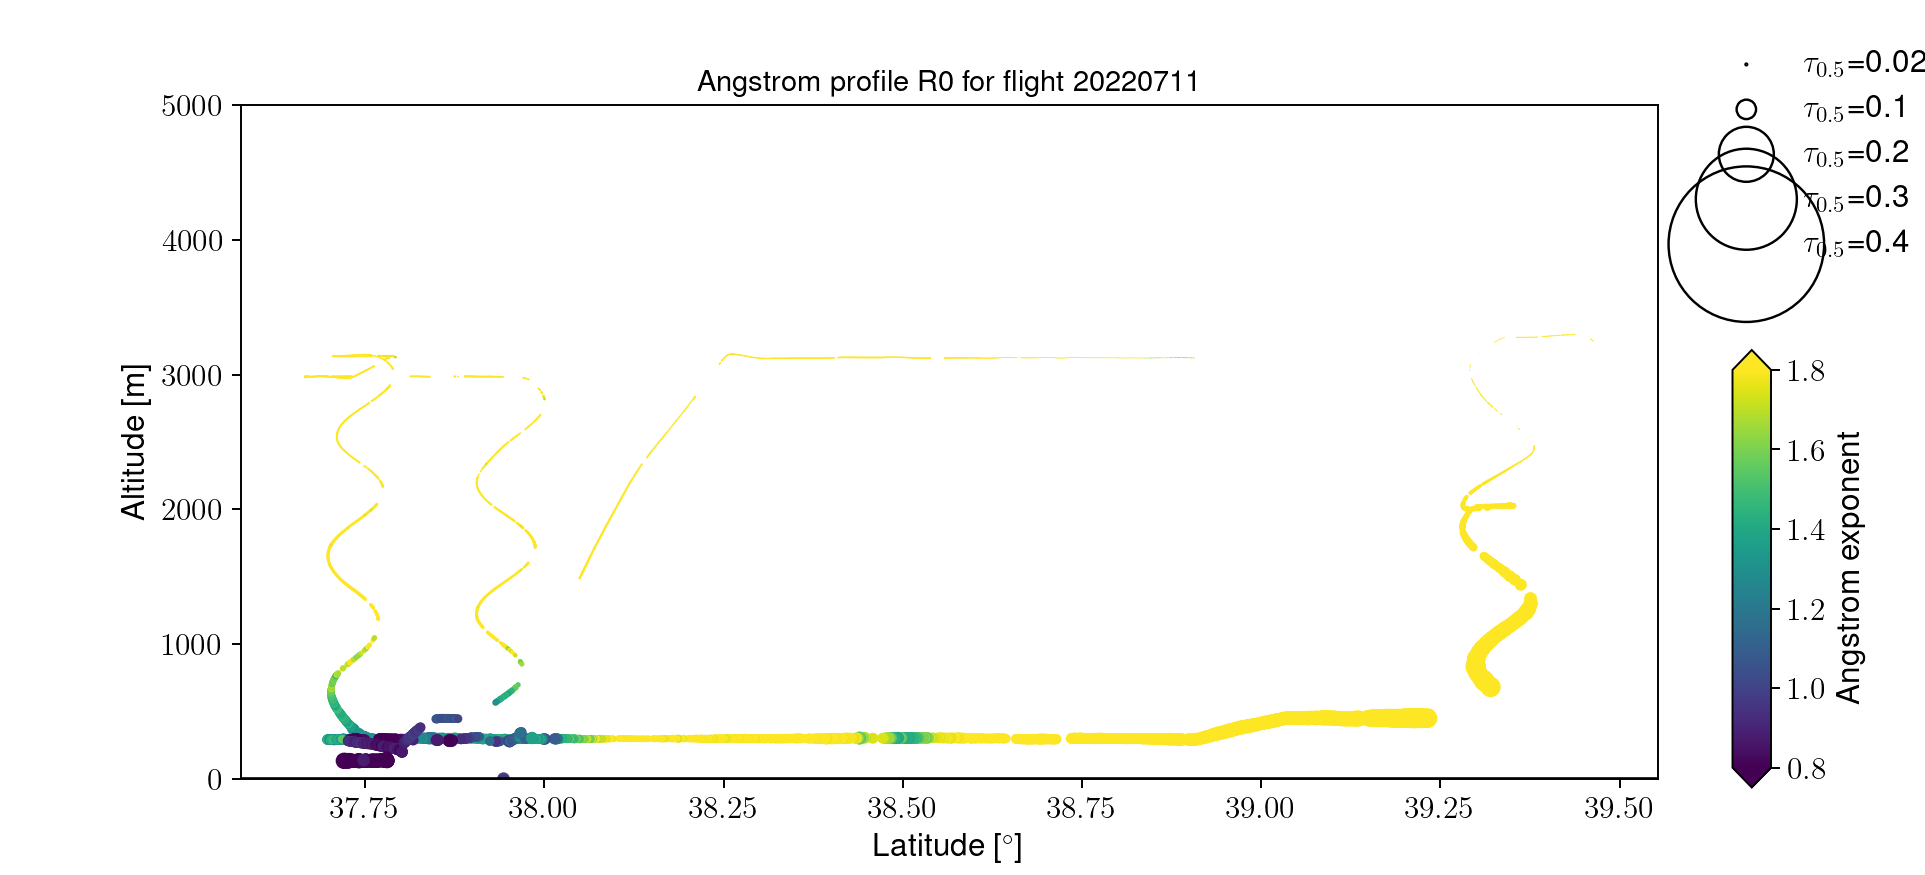

In [67]:
for i,d in enumerate(days):
    fig,ax = plt.subplots(1,sharex=True,figsize=(11,5))
    ax.set_title('Angstrom profile {} for flight {} {lv}'.format(vv,d,lv=lvs[i].strip('_')))
    v = ax.scatter(outaod_RA[i]['Latitude'][outaod_RA[i]['qual_flag']==0],outaod_RA[i]['GPS_Alt'][outaod_RA[i]['qual_flag']==0],
                   (40*outaod_RA[i][wl[4]][outaod_RA[i]['qual_flag']==0])**3.0,
                   c=outaod_RA[i]['AOD_angstrom_470_865'][outaod_RA[i]['qual_flag']==0],
                   marker='o',edgecolor='None',vmin=0.8,vmax=1.8)
    ax.set_ylabel('Altitude [m]')
    ax.set_ylim(0,5000)
    #ax.set_xlim(-23.5,-9.5)
    ax.axhline(0,color='k')
    ax.set_xlabel('Latitude [$^\\circ$]')
   
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.95, box.height])
    
    cbaxes = fig.add_axes([0.9, 0.1, 0.02, 0.5]) 
    cbar =  plt.colorbar(v,extend='both',cax=cbaxes)
    cbar.set_label('Angstrom exponent')
    
    sizes = [0.02,0.1,0.2,0.3,0.4]
    labels = ['$\\tau_{{0.5}}$={0}'.format(s) for s in sizes]
    points = [ax.scatter([], [], s=(40*s)**3.0, c='None',marker='o',edgecolor='k') for s in sizes]
    plt.legend(points, labels, scatterpoints=1,frameon=False,loc='upper left',bbox_to_anchor=(-1.2,1.75))
    
    plt.savefig(fp+'plots/AOD_ict_{vv}/{vv}_{}{lv}_lat_alt_angstrom.png'.format(d,vv=vv,vi=vi,lv=lvs[i]),dpi=600,transparent=True)

## Plotting of AOD per altitude and Angstrom

<IPython.core.display.Javascript object>


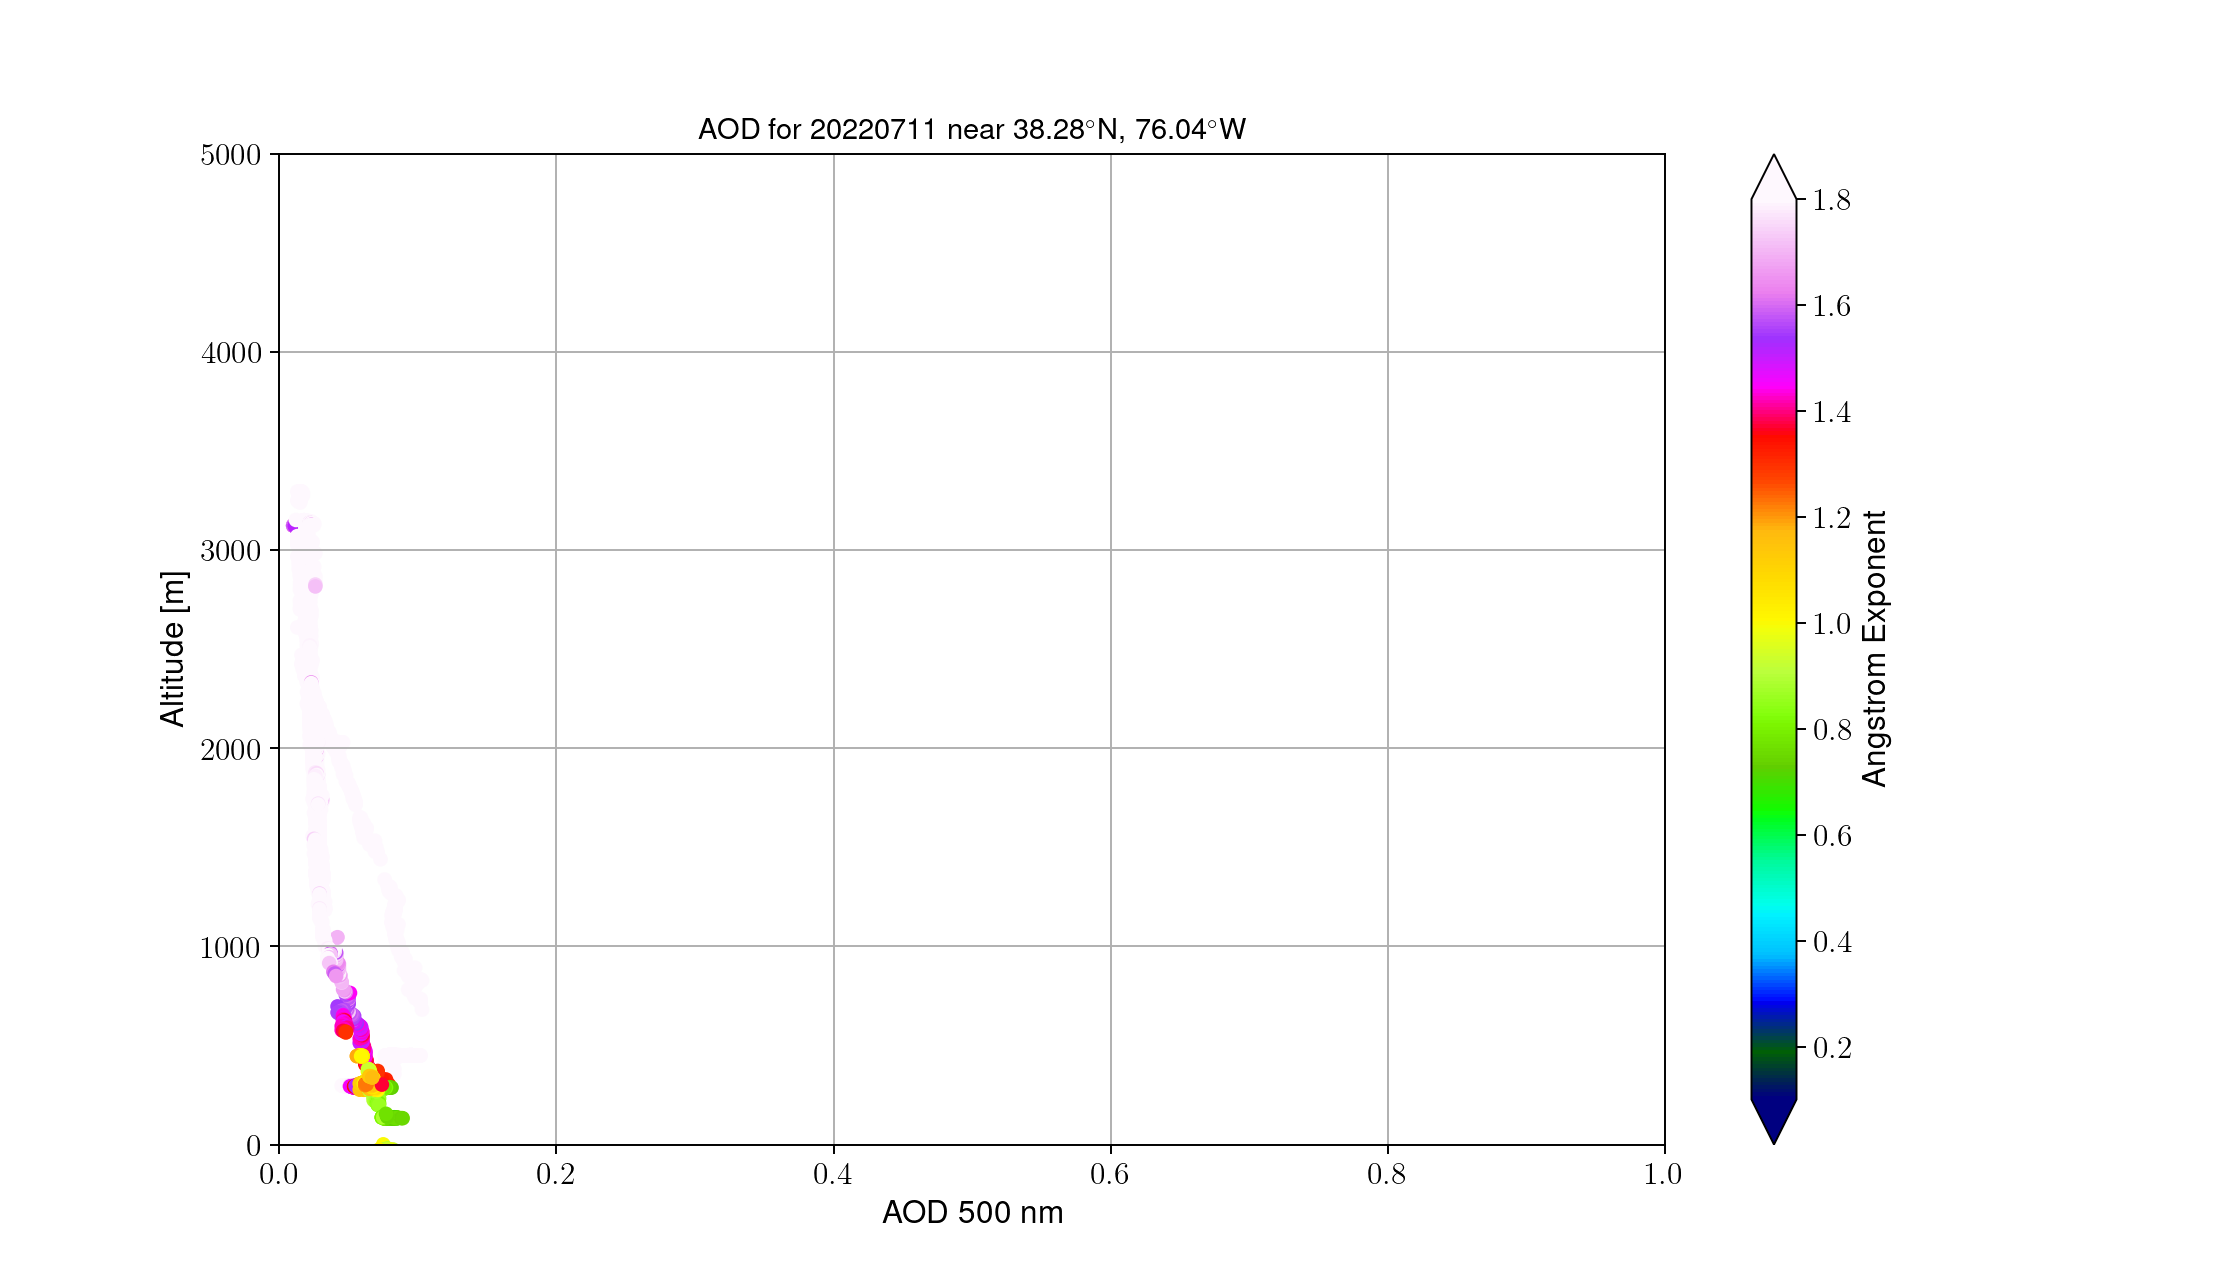

In [68]:
for i,d in enumerate(days):
    plt.figure()
    #d = days[15]
    #plt.plot(outaod_RA[i]['AOD0501'],outaod_RA[i]['GPS_Alt'],'+',color='lightgrey',zorder=0)
    #if i==1:
    #    iiu = (outaod_RA[i]['qual_flag']==0) & (outaod_RA[i]['Latitude']>10.0)
    #else:
    #    iiu = (outaod_RA[i]['qual_flag']==0) & (outaod_RA[i]['Latitude']<-9.0)
    iiu = outaod_RA[i]['qual_flag']==0
    b = plt.scatter(outaod_RA[i]['AOD0501'][iiu],outaod_RA[i]['GPS_Alt'][iiu],
                marker='o',edgecolor='None',c=outaod_RA[i]['AOD_angstrom_470_865'][iiu],cmap='gist_ncar',vmin=0.1,vmax=1.8)
    #plt.axhline(600)
    #plt.axhline(1200)
    plt.xlim(0,1.0)
    plt.ylim(0,5000)
    plt.grid()
    plt.xlabel('AOD 500 nm')
    plt.ylabel('Altitude [m]')
    iiula,iiulo = np.nanmean(outaod_RA[i]['Latitude'][iiu]),np.nanmean(outaod_RA[i]['Longitude'][iiu])
    plt.title('AOD for {}{lv} near {:2.2f}$^{{\circ}}${}, {:2.2f}$^{{\circ}}${}'.format(
        d,abs(iiula),'N' if iiula>0 else 'S',abs(iiulo),'E' if iiulo>0 else 'W',lv=lvs[i].strip('_')))
    try:
        cb = plt.colorbar(b,extend='both')
        cb.set_label('Angstrom Exponent')
    except:
        pass
    plt.savefig(fp+'plots/AOD_ict_{vv}/{vv}_{}{lv}_aod_alt_AE.png'.format(d,vv=vv,vi=vi,lv=lvs[i]),dpi=600,transparent=True)

# Combine all the data in a single array

In [69]:
ar = {}
for n in nm:
    ar[n] = np.array([])

In [70]:
ar['days'] = np.array([])

In [71]:
for i,d in enumerate(days):
    ar['days'] = np.append(ar['days'],np.zeros_like(outaod_RA[i]['Start_UTC'])+i)
    for n in nm:
        ar[n] = np.append(ar[n],outaod_RA[i][n])

In [72]:
ar['GPS_Alt'].shape

(12360,)

In [73]:
ar.keys()

dict_keys(['Start_UTC', 'Latitude', 'Longitude', 'GPS_Alt', 'qual_flag', 'amass_aer', 'AOD_angstrom_470_865', 'AOD_polycoef_a2', 'AOD_polycoef_a1', 'AOD_polycoef_a0', 'AOD0356', 'AOD0380', 'AOD0452', 'AOD0470', 'AOD0501', 'AOD0520', 'AOD0530', 'AOD0532', 'AOD0550', 'AOD0606', 'AOD0620', 'AOD0660', 'AOD0675', 'AOD0706', 'AOD0781', 'AOD0865', 'AOD1020', 'AOD1040', 'AOD1064', 'AOD1236', 'AOD1250', 'AOD1559', 'AOD1627', 'AOD1650', 'UNCAOD0356', 'UNCAOD0380', 'UNCAOD0452', 'UNCAOD0470', 'UNCAOD0501', 'UNCAOD0520', 'UNCAOD0530', 'UNCAOD0532', 'UNCAOD0550', 'UNCAOD0606', 'UNCAOD0620', 'UNCAOD0660', 'UNCAOD0675', 'UNCAOD0706', 'UNCAOD0781', 'UNCAOD0865', 'UNCAOD1020', 'UNCAOD1040', 'UNCAOD1064', 'UNCAOD1236', 'UNCAOD1250', 'UNCAOD1559', 'UNCAOD1627', 'UNCAOD1650', 'days'])

## filter for low altitudes

In [74]:
ar['fl_alt'] = (ar['GPS_Alt']>600) & (ar['GPS_Alt']<1800)

In [75]:
ar['fl_alt_6'] = ar['GPS_Alt']<=600

In [76]:
ar['fl_alt_18'] = ar['GPS_Alt']>=1800

In [77]:
ar['fl_alt_22'] = (ar['GPS_Alt']<=2200) & (ar['GPS_Alt']>=800)

In [78]:
ar['fl_QA'] = ar['qual_flag']==0

In [79]:
ar['fl1'] = ar['fl_QA']&ar['fl_alt_6']

In [80]:
ar['fl2'] = ar['fl_QA']&ar['fl_alt_18']

In [81]:
ar['fl3'] = ar['fl_QA'] & ar['fl_alt_22']

## save to file

In [87]:
import hdf5storage as hs

In [88]:
hs.savemat(fp+'data_archival/AOD_ict_{vv}//all_aod_ict_{vv}_SaSa2022.mat'.format(vv=vv),ar)

## Optionally load the file

In [37]:
import hdf5storage as hs

In [9]:
ar = hs.loadmat(fp+'data_archival/AOD_ict_{vv}//all_aod_ict_{vv}_SaSa2022.mat'.format(vv=vv))

## Plot a histogram of all the AOD

In [89]:
from plotting_utils import prelim

<IPython.core.display.Javascript object>


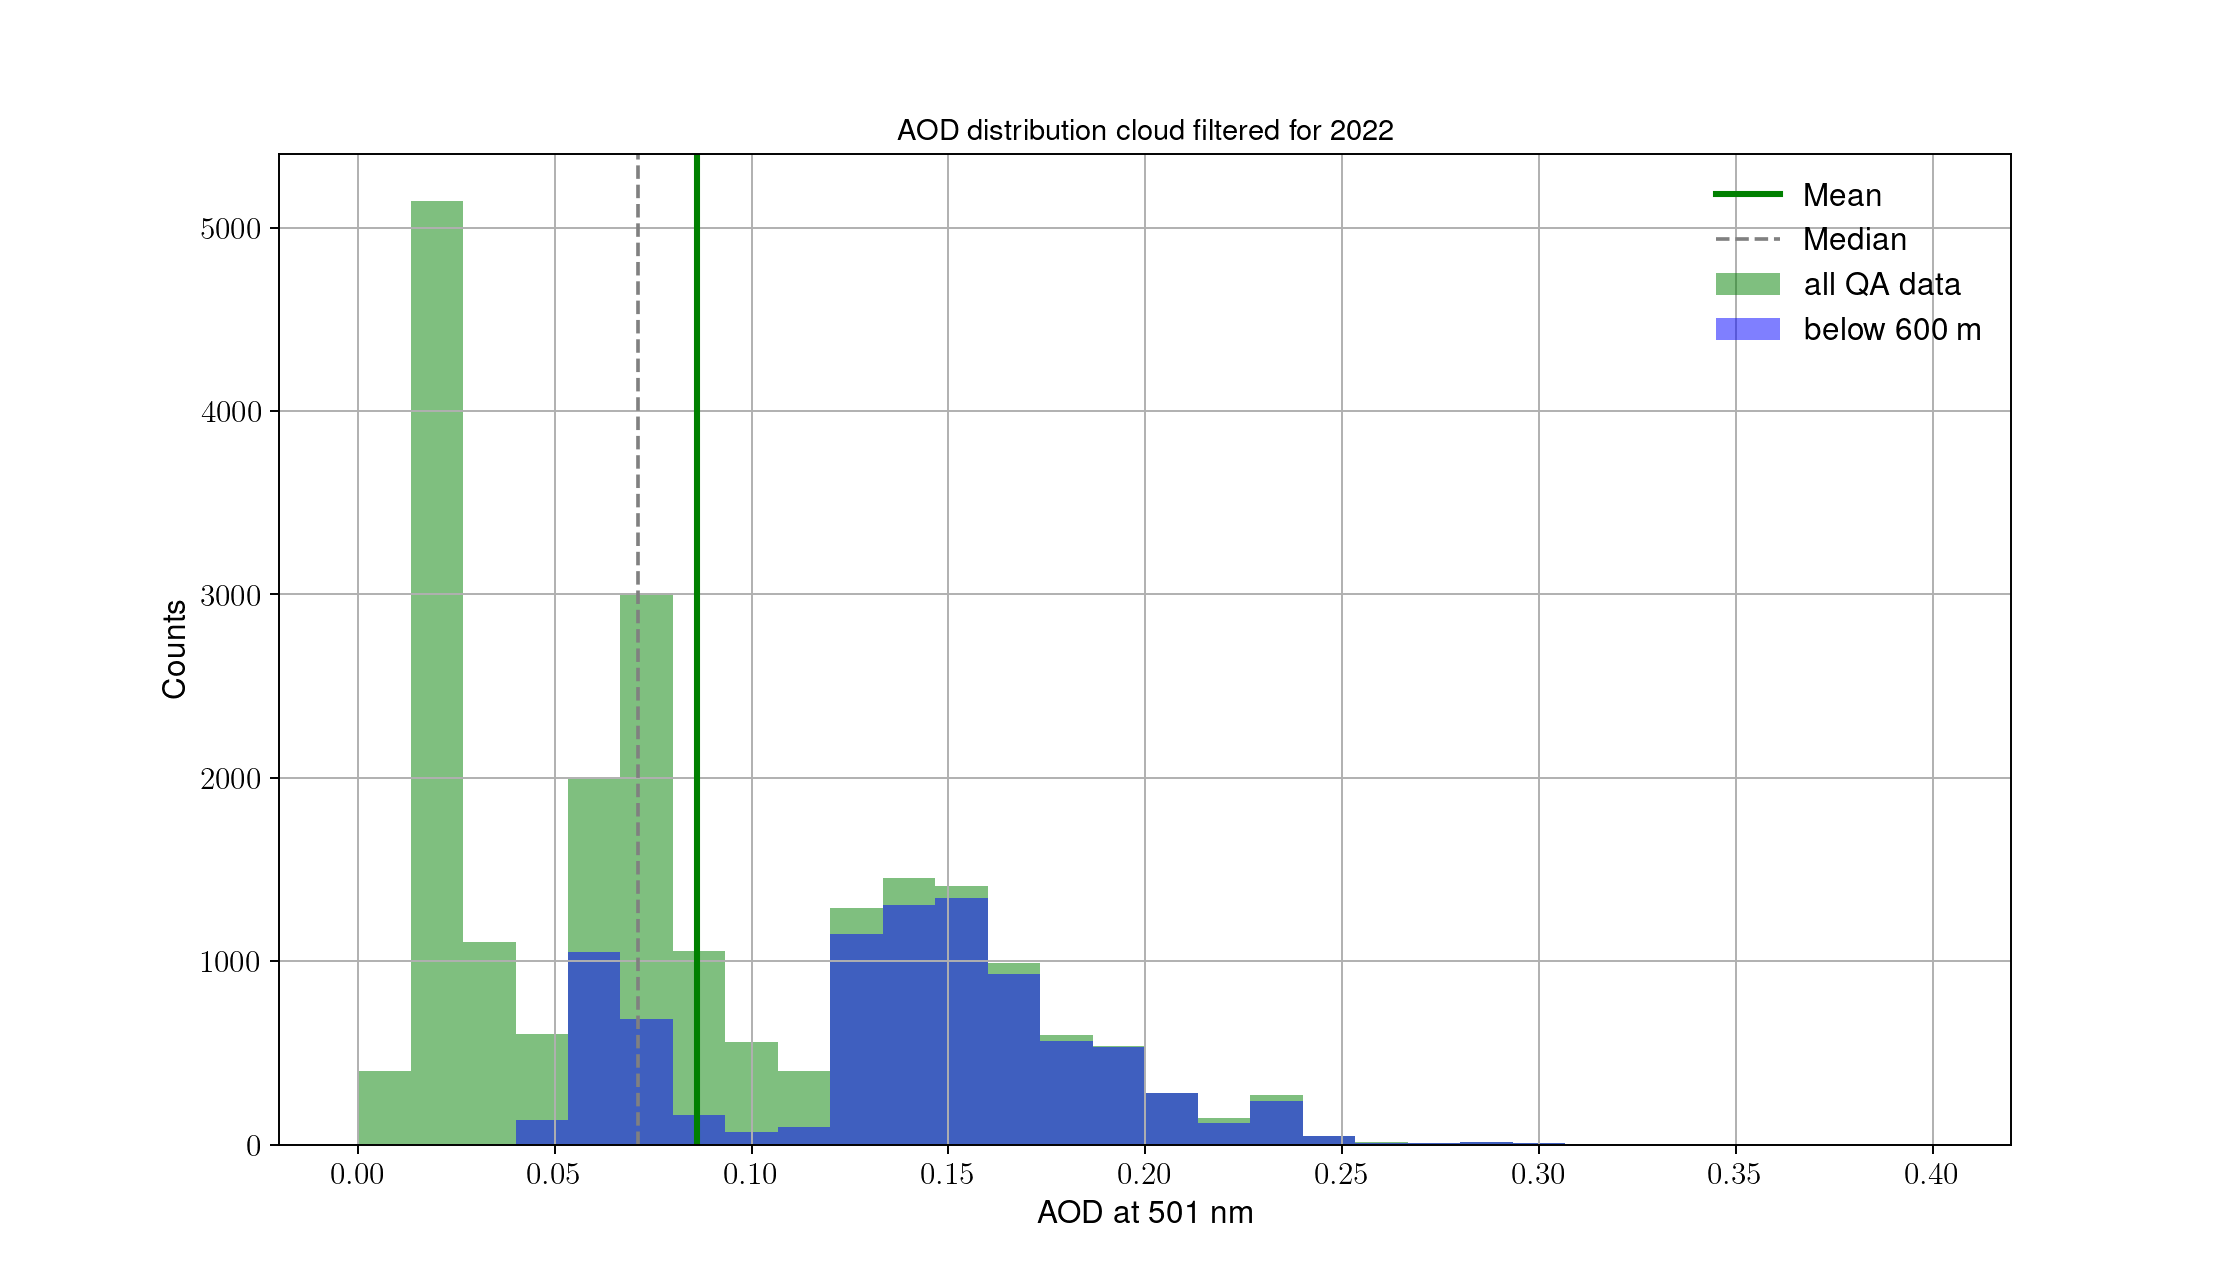

In [91]:
plt.figure()
plt.hist(ar['AOD0501'][ar['fl_QA']],bins=30,range=(0,0.4),alpha=0.5,edgecolor='None',color='g',label='all QA data')
plt.hist(ar['AOD0501'][ar['fl1']],bins=30,range=(0,0.4),alpha=0.5,edgecolor='None',color='b',label='below 600 m')
#plt.hist(ar['AOD0501'][ar['flr']],bins=30,range=(0,1.0),alpha=0.5,normed=False,edgecolor='None',color='y',label='Routine only')
#plt.hist(ar['AOD0501'][ar['fl2']],bins=30,range=(0,1.0),alpha=0.5,normed=False,edgecolor='None',color='r',label='above 1800 m')
#plt.yscale('log')
plt.axvline(x=np.nanmean(ar['AOD0501'][ar['fl_QA']]),ls='-',color='g',lw=2.5,label='Mean')
plt.axvline(x=np.nanmedian(ar['AOD0501'][ar['fl_QA']]),ls='--',color='grey',label='Median')

#plt.axvline(x=np.nanmean(ar['AOD0501'][ar['flr']]),ls='-',color='y',lw=2.5)
#plt.axvline(x=np.nanmedian(ar['AOD0501'][ar['flr']]),ls='--',color='darkkhaki')

plt.xlabel('AOD at 501 nm')
plt.ylabel('Counts')
plt.grid()
plt.title('AOD distribution cloud filtered for 2022')
#prelim()
plt.legend(frameon=False)
plt.savefig(fp+'plots/AOD_ict_{vv}/SaSa2022_{vv}_AOD_histogram.png'.format(vv=vv),dpi=600,transparent=True)

<IPython.core.display.Javascript object>


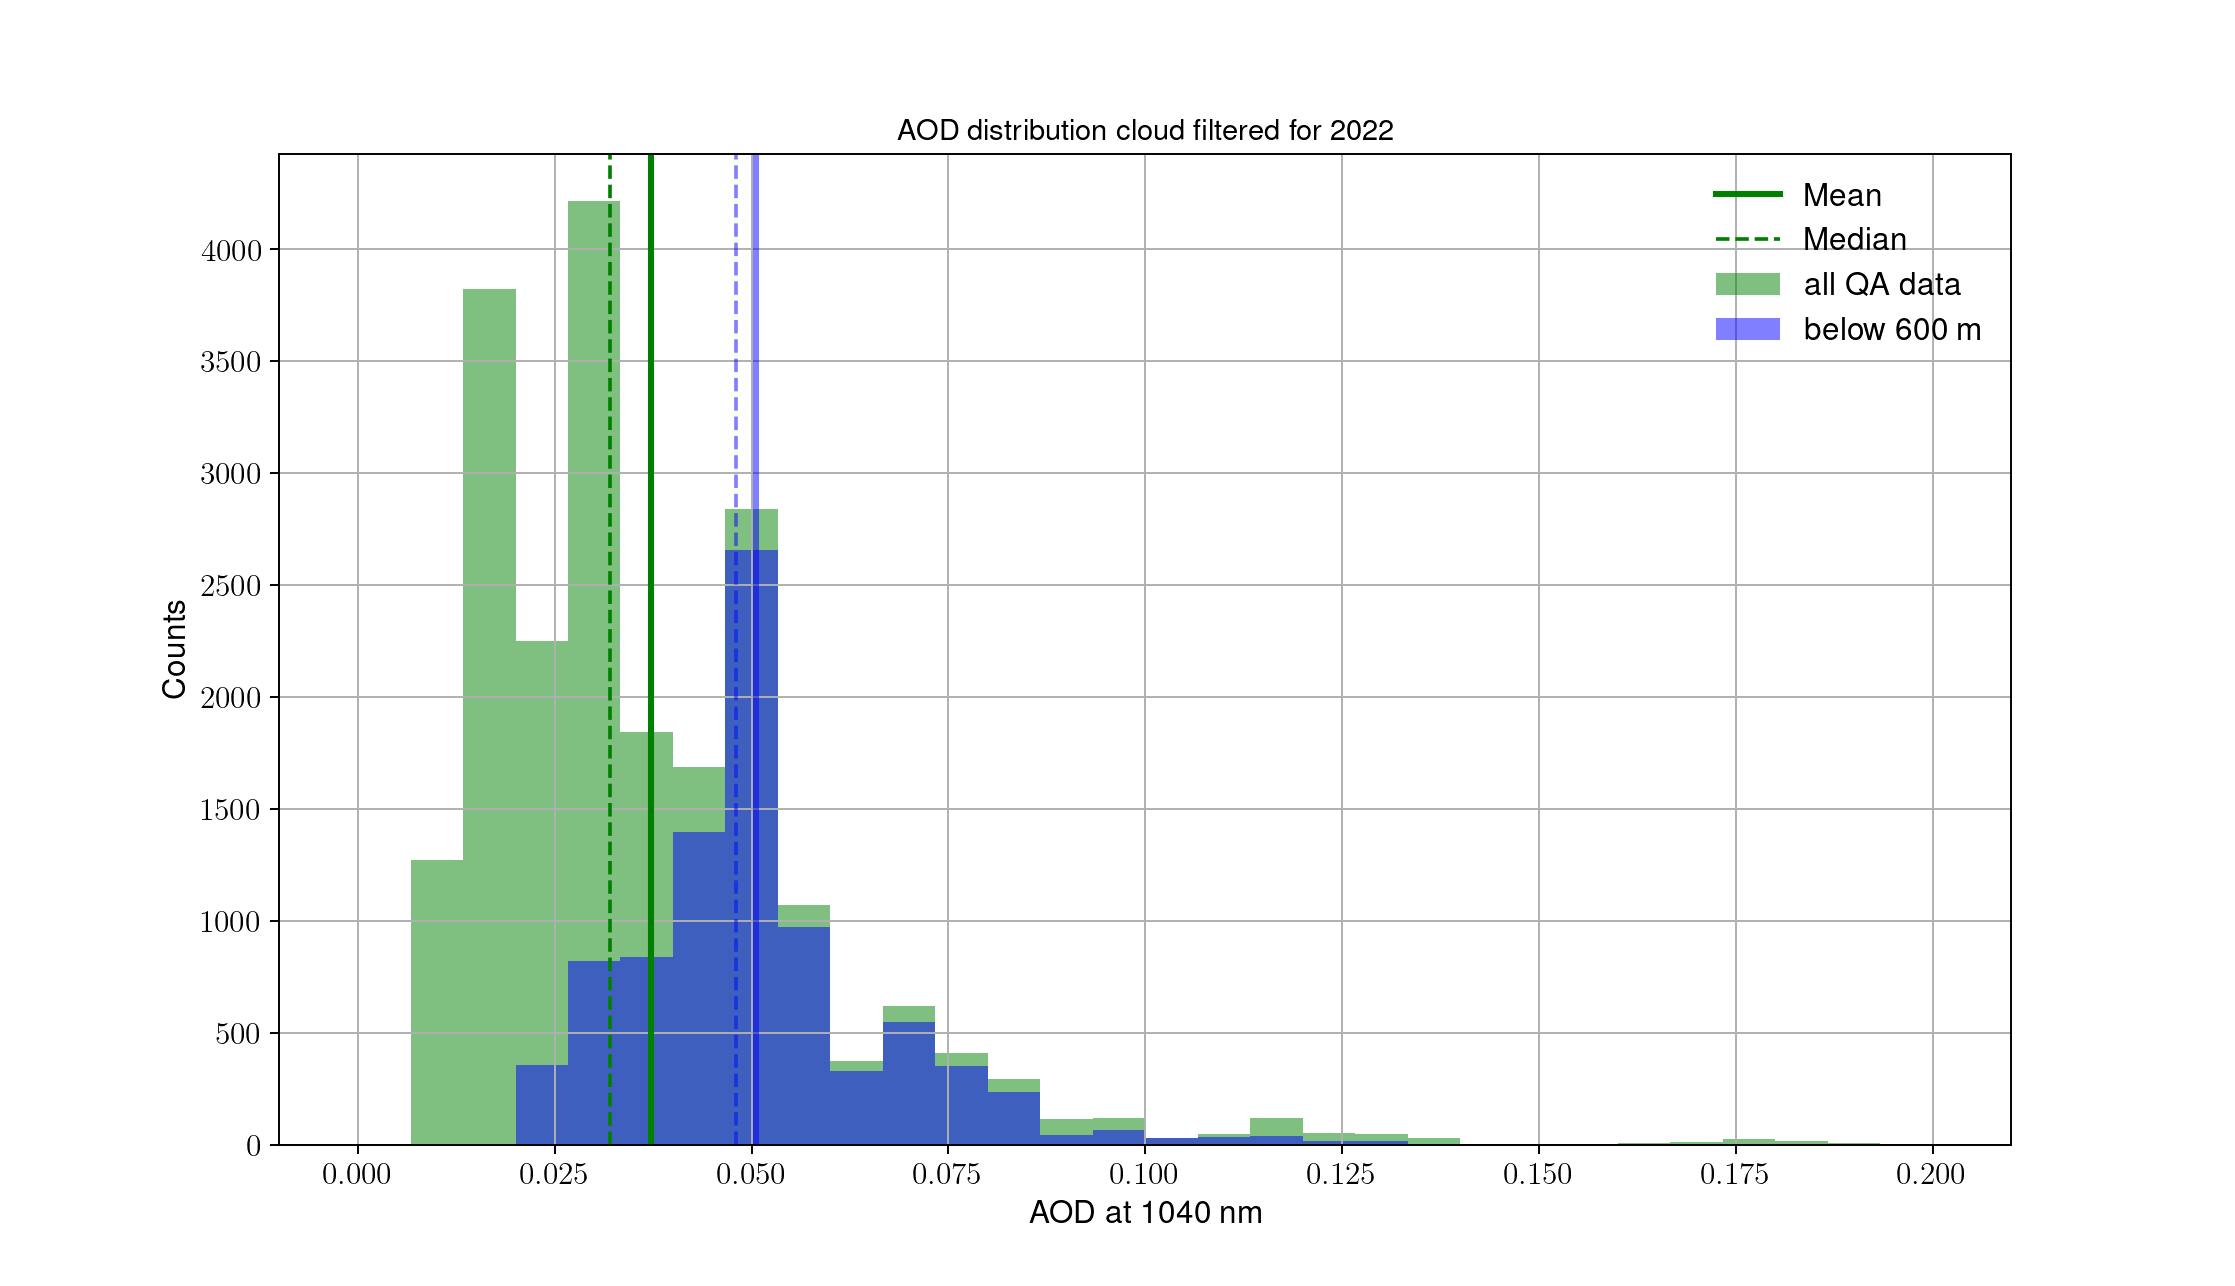

In [93]:
plt.figure()
plt.hist(ar['AOD1040'][ar['fl_QA']],bins=30,range=(0,0.2),alpha=0.5,edgecolor='None',color='g',label='all QA data')
plt.hist(ar['AOD1040'][ar['fl1']],bins=30,range=(0,0.2),alpha=0.5,edgecolor='None',color='b',label='below 600 m')
#plt.hist(ar['AOD0501'][ar['flr']],bins=30,range=(0,1.0),alpha=0.5,normed=False,edgecolor='None',color='y',label='Routine only')
#plt.hist(ar['AOD0501'][ar['fl2']],bins=30,range=(0,1.0),alpha=0.5,normed=False,edgecolor='None',color='r',label='above 1800 m')
#plt.yscale('log')
plt.axvline(x=np.nanmean(ar['AOD1040'][ar['fl_QA']]),ls='-',color='g',lw=2.5,label='Mean')
plt.axvline(x=np.nanmedian(ar['AOD1040'][ar['fl_QA']]),ls='--',color='g',label='Median')
plt.axvline(x=np.nanmean(ar['AOD1040'][ar['fl1']]),ls='-',color='b',lw=2.5,alpha=0.5)
plt.axvline(x=np.nanmedian(ar['AOD1040'][ar['fl1']]),ls='--',color='b',alpha=0.5)

#plt.axvline(x=np.nanmean(ar['AOD0501'][ar['flr']]),ls='-',color='y',lw=2.5)
#plt.axvline(x=np.nanmedian(ar['AOD0501'][ar['flr']]),ls='--',color='darkkhaki')

plt.xlabel('AOD at 1040 nm')
plt.ylabel('Counts')
plt.grid()
plt.title('AOD distribution cloud filtered for 2022')
#prelim()
plt.legend(frameon=False)
plt.savefig(fp+'plots/AOD_ict_{vv}/SaSa2022_{vv}_AOD1040_histogram.png'.format(vv=vv),dpi=600,transparent=True)

<IPython.core.display.Javascript object>


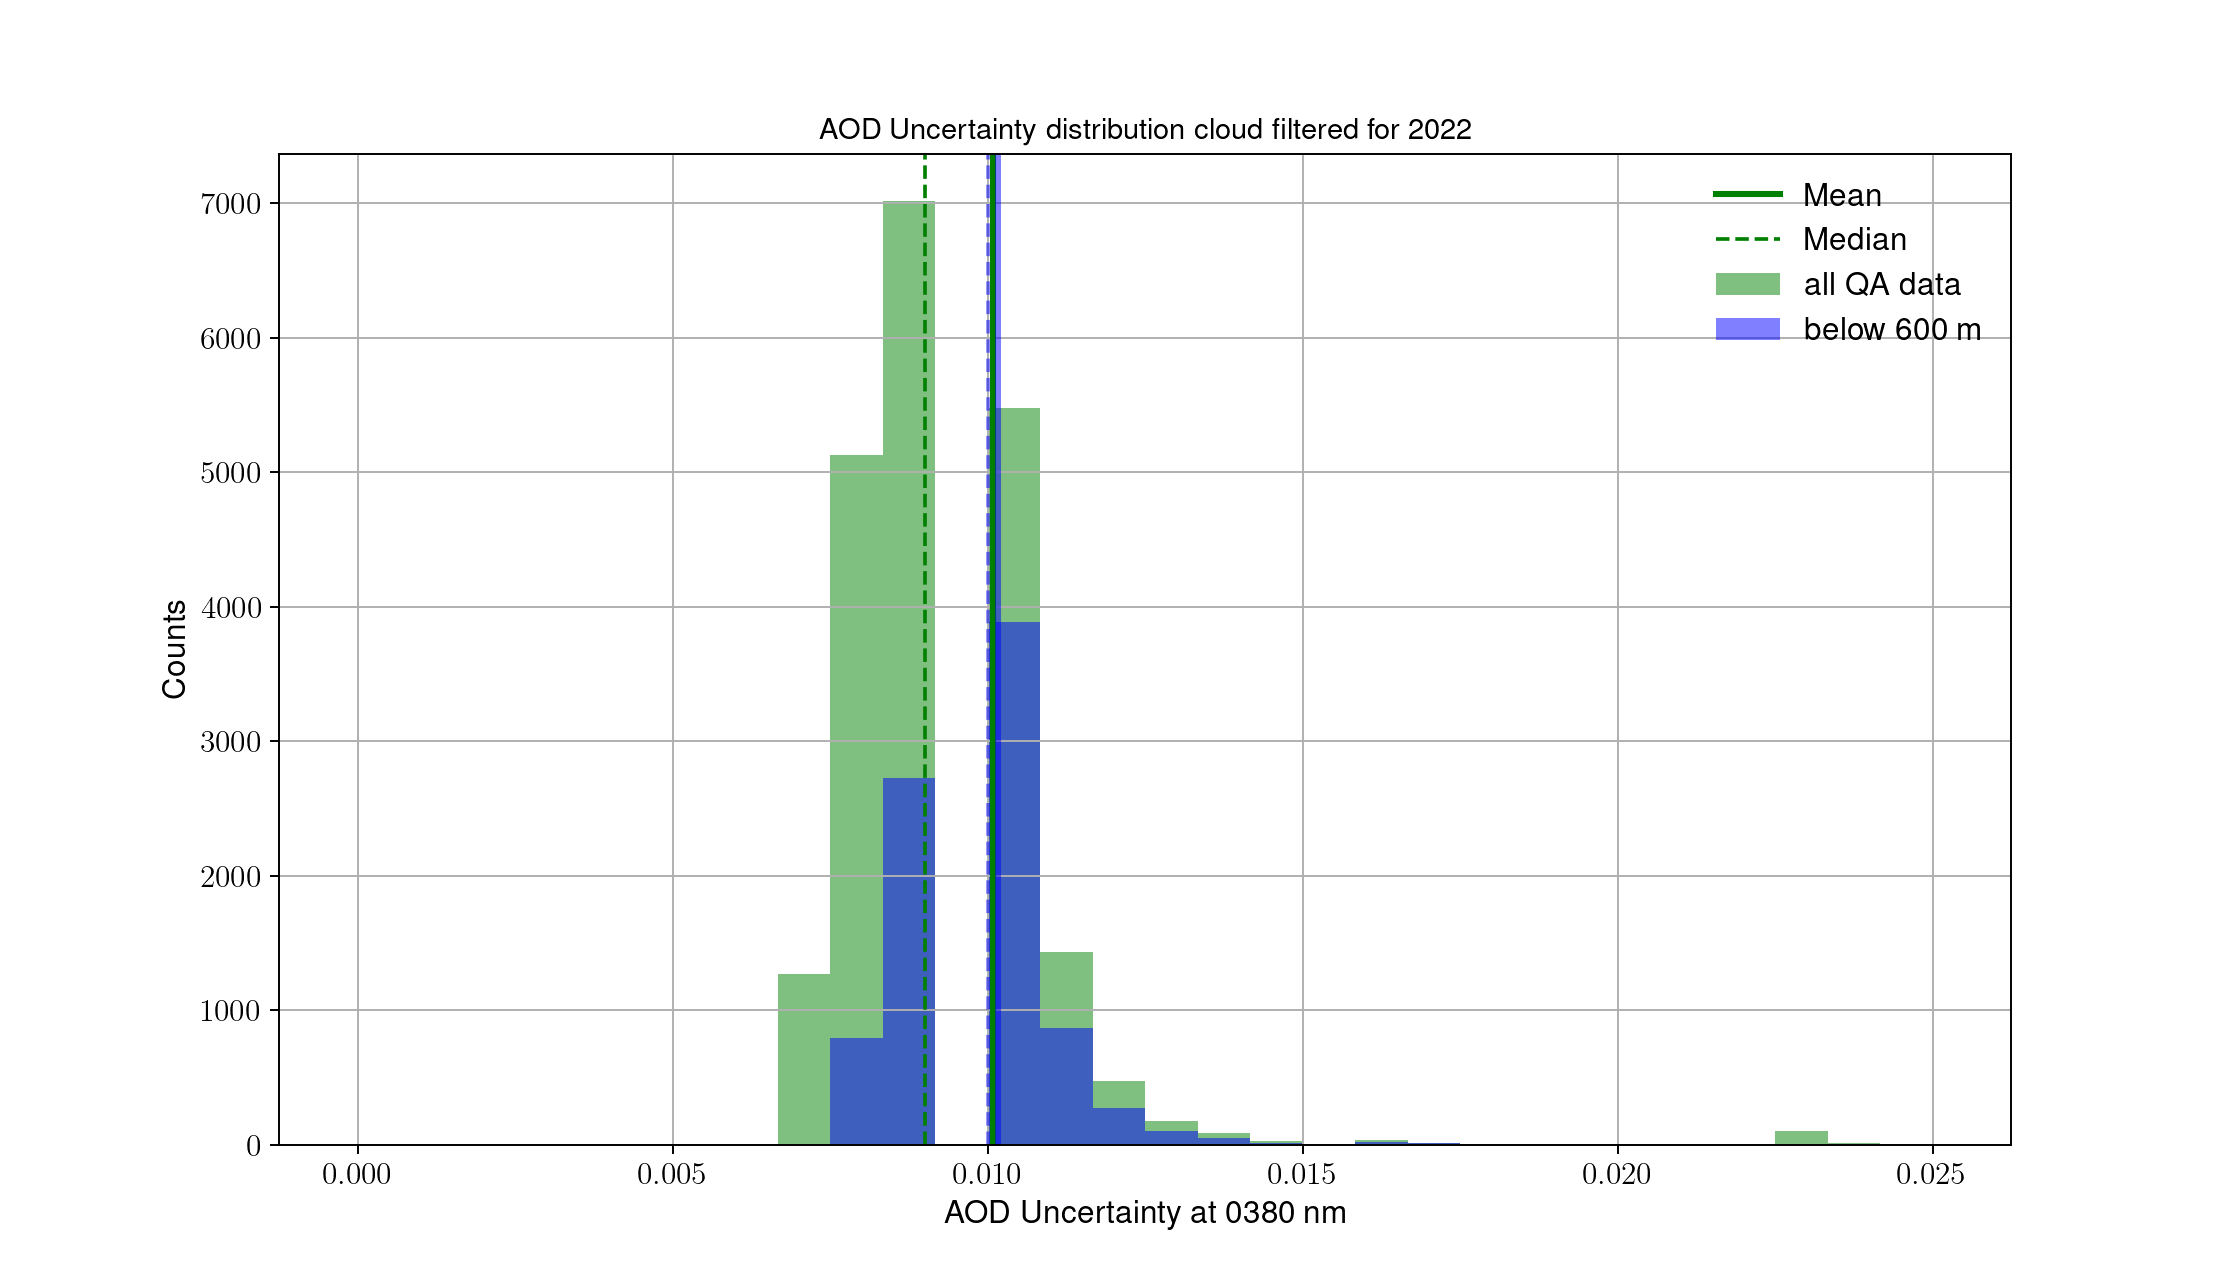

<IPython.core.display.Javascript object>


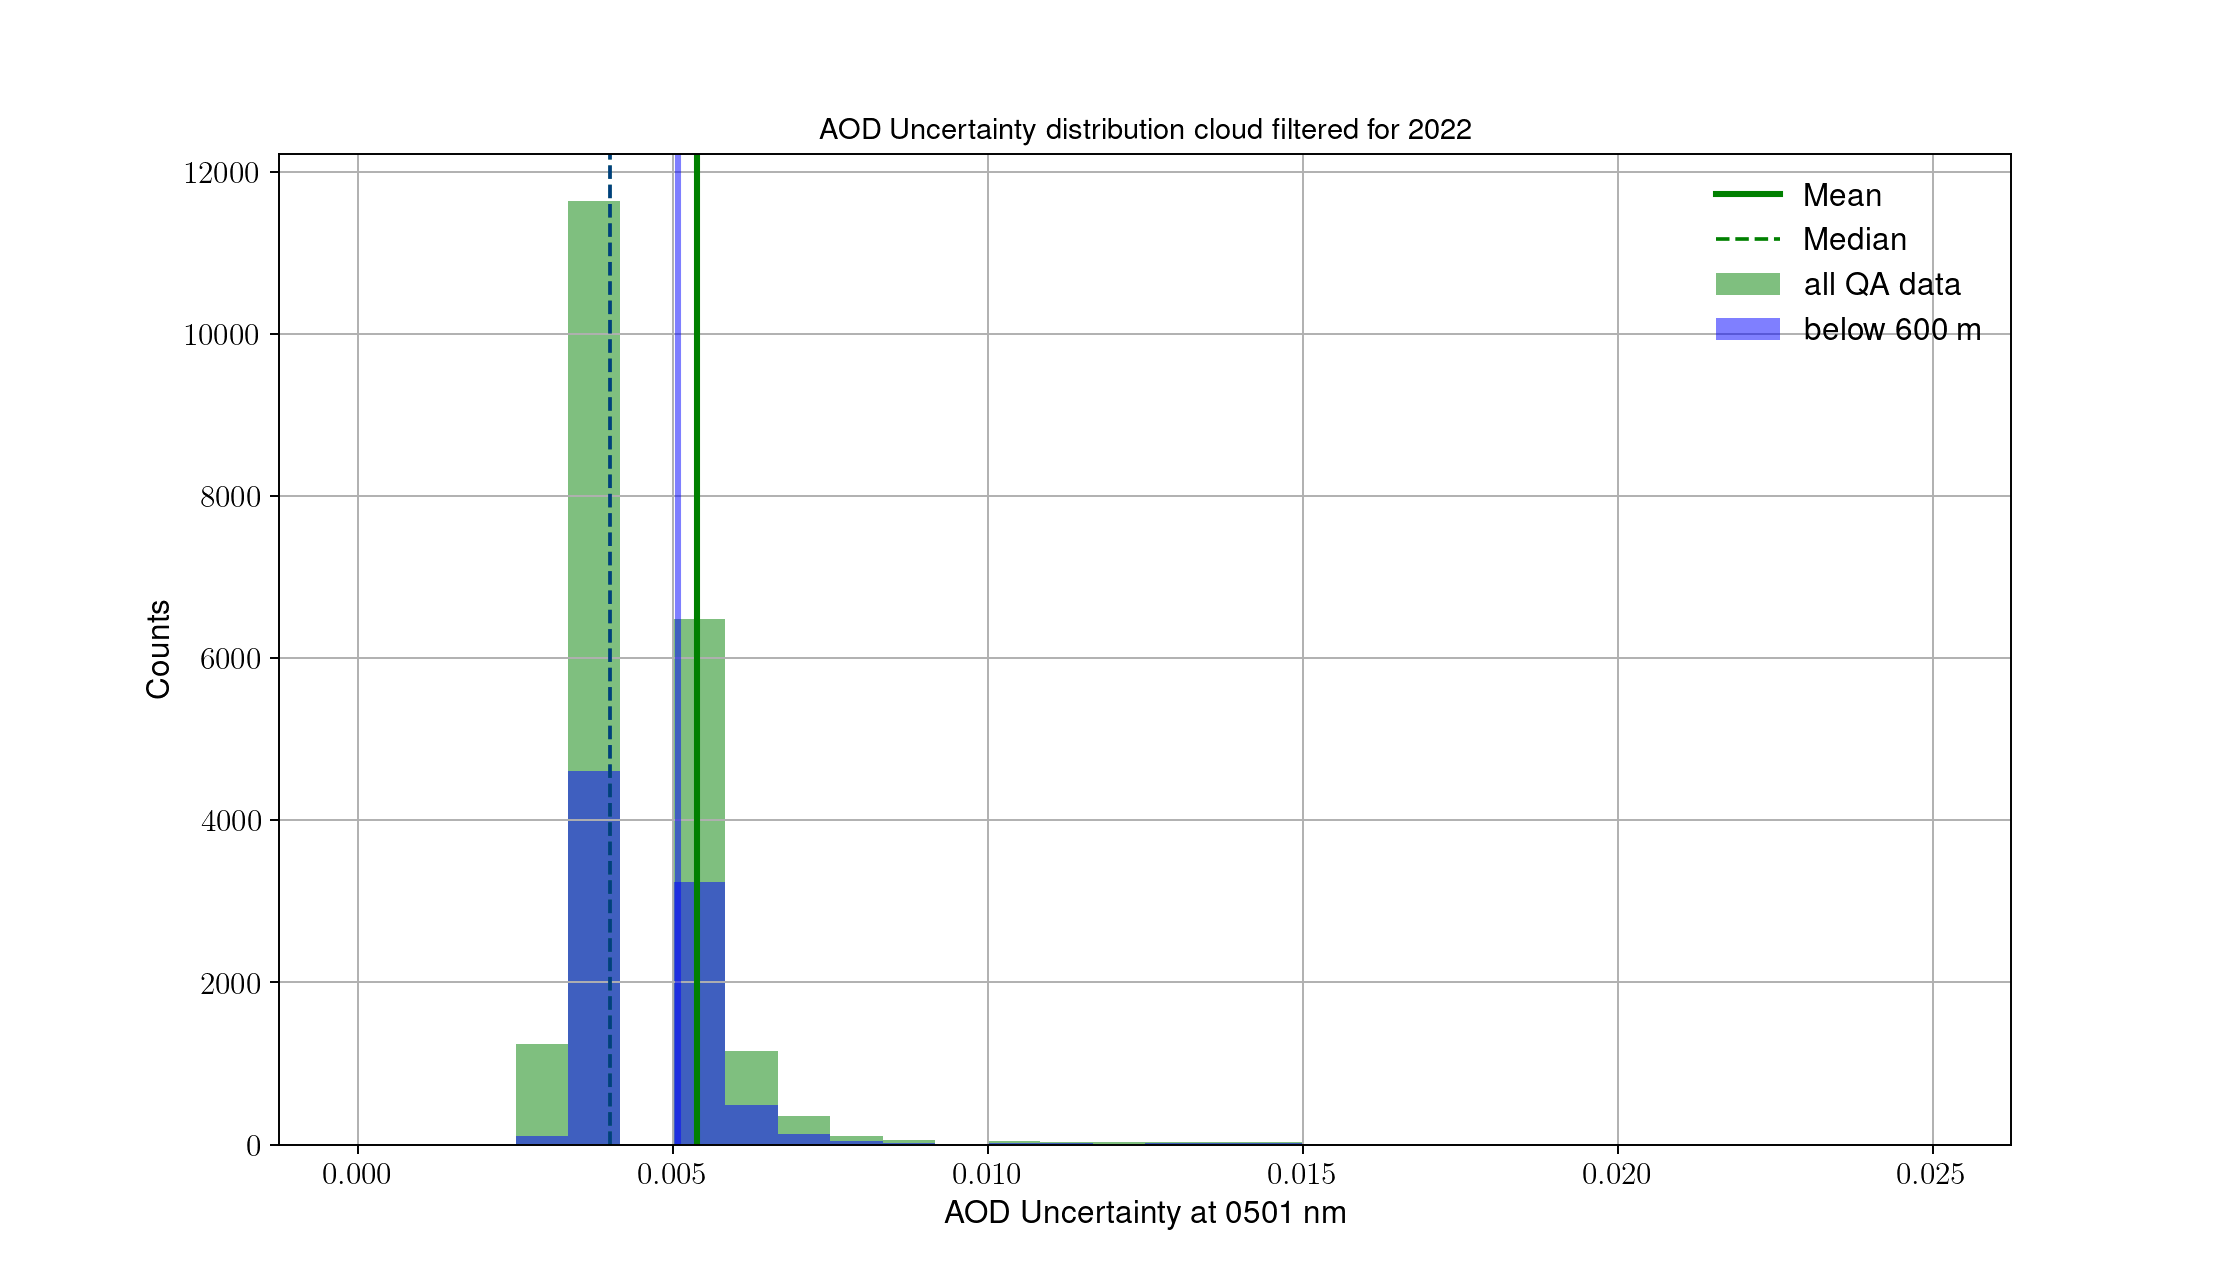

<IPython.core.display.Javascript object>


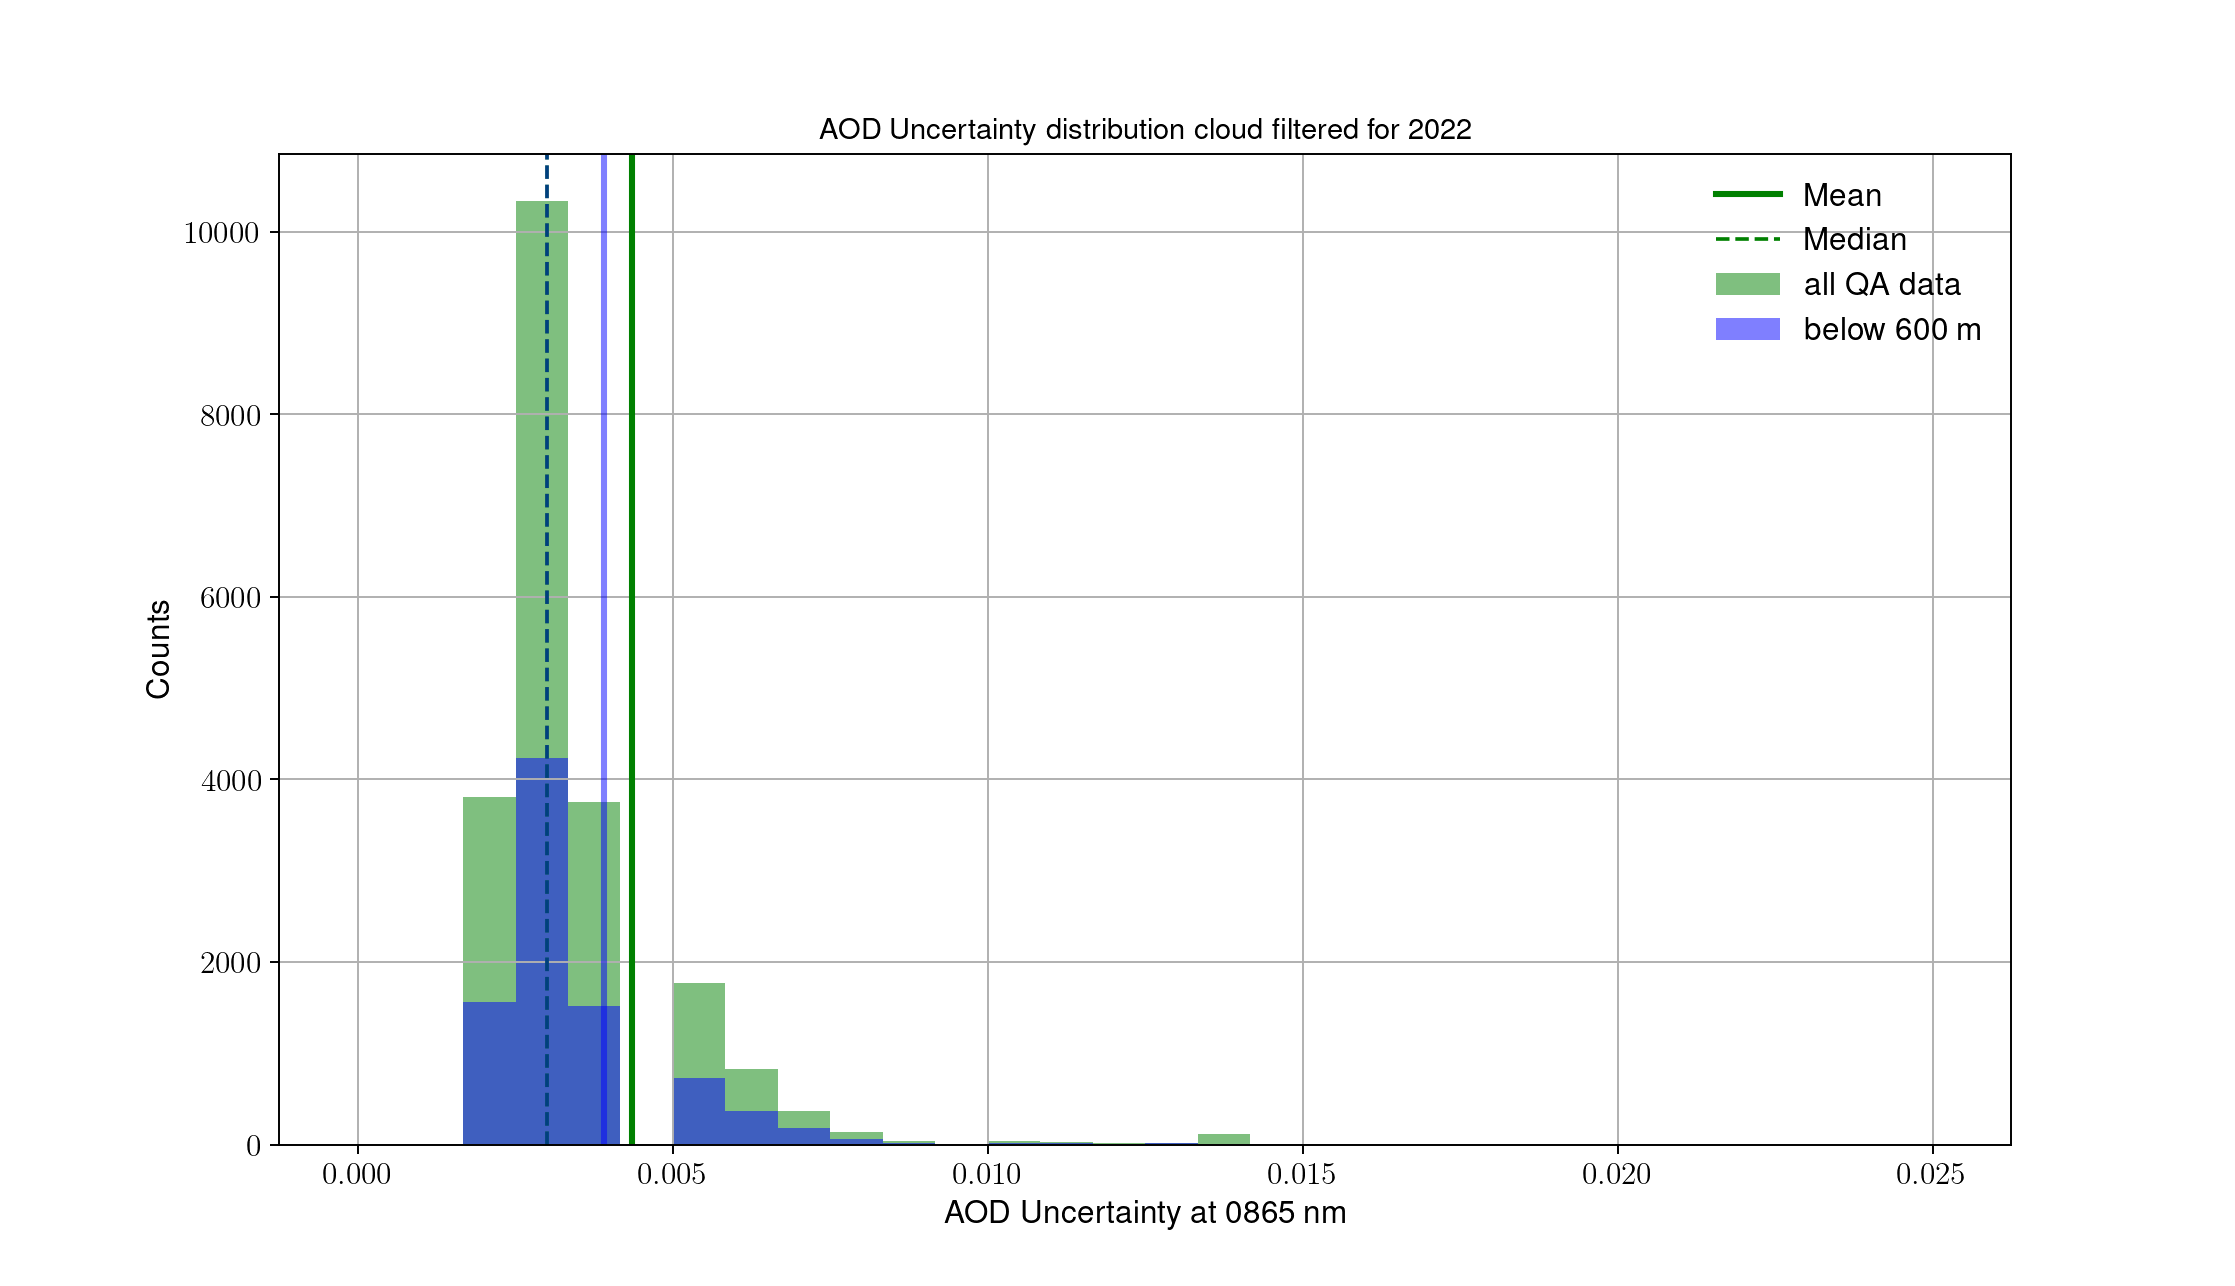

<IPython.core.display.Javascript object>


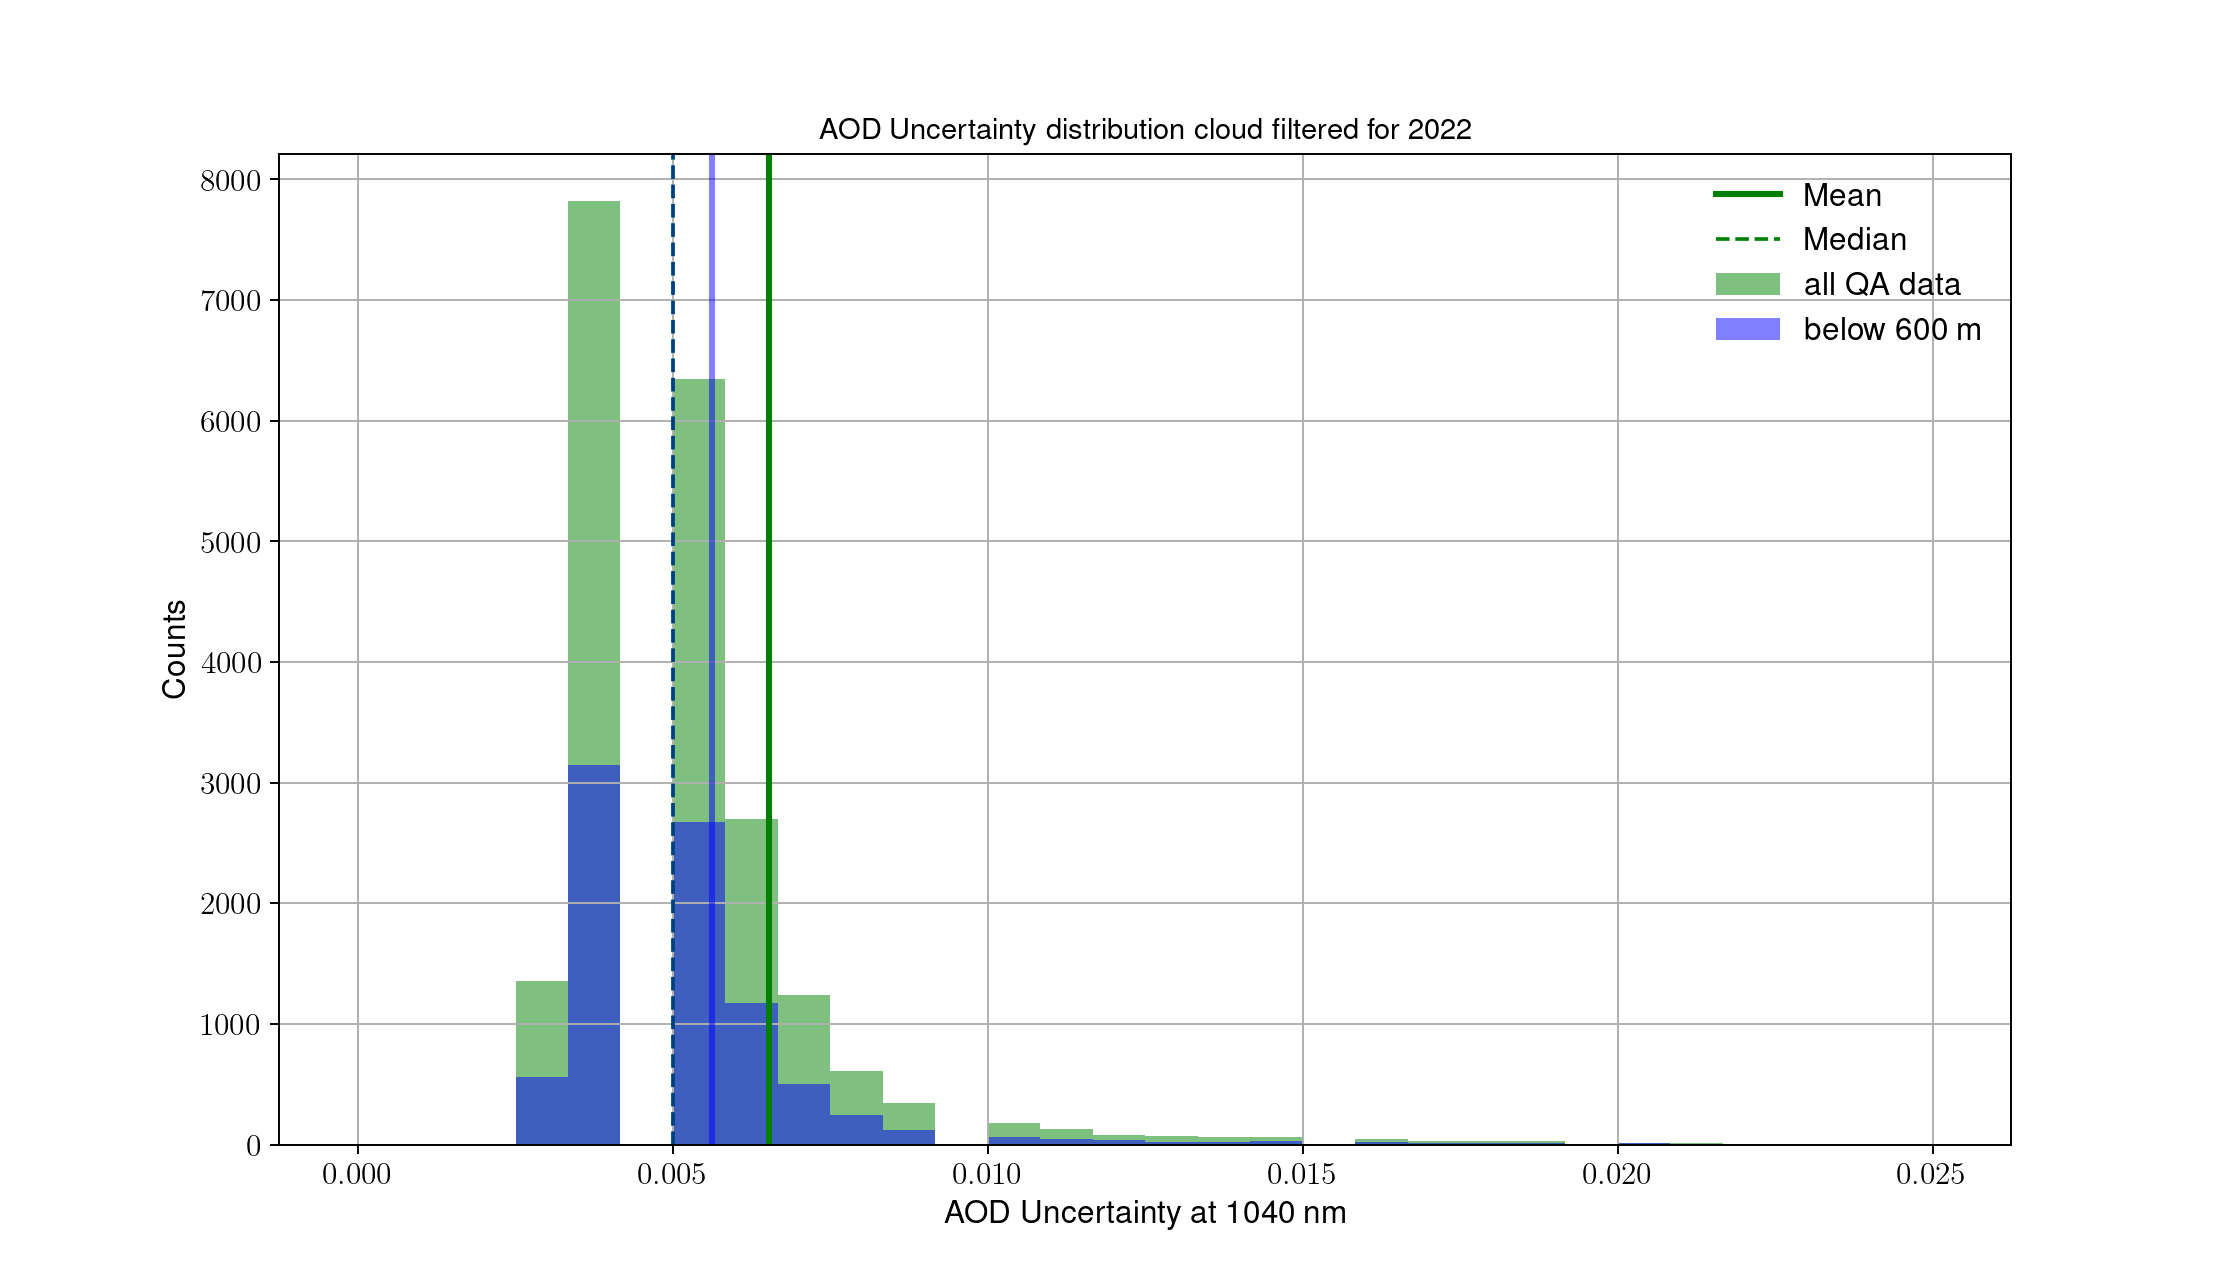

<IPython.core.display.Javascript object>


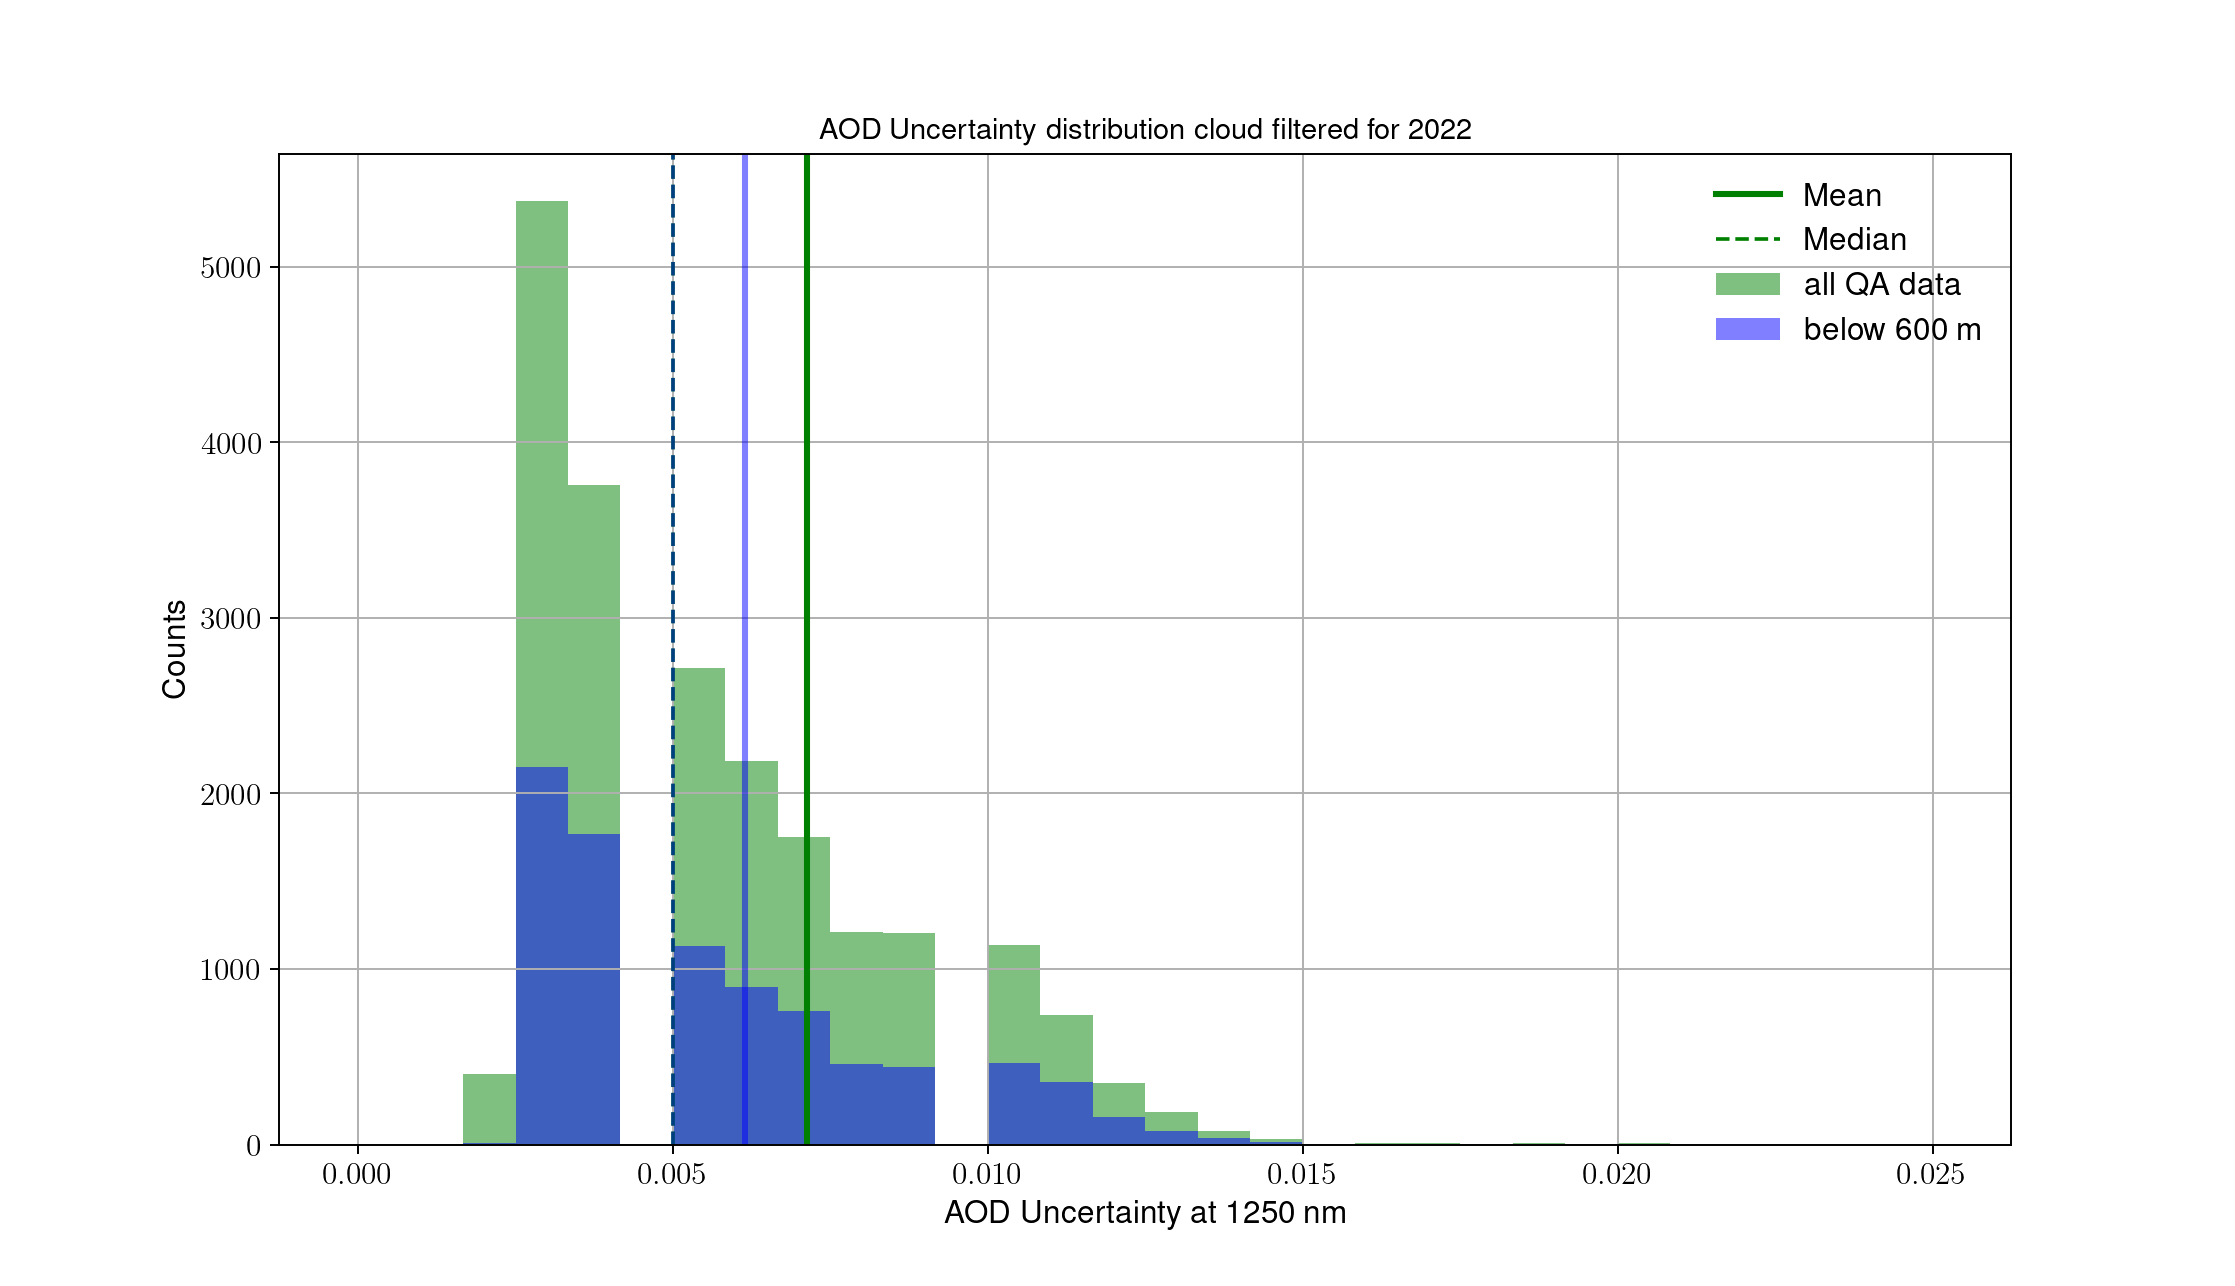

<IPython.core.display.Javascript object>


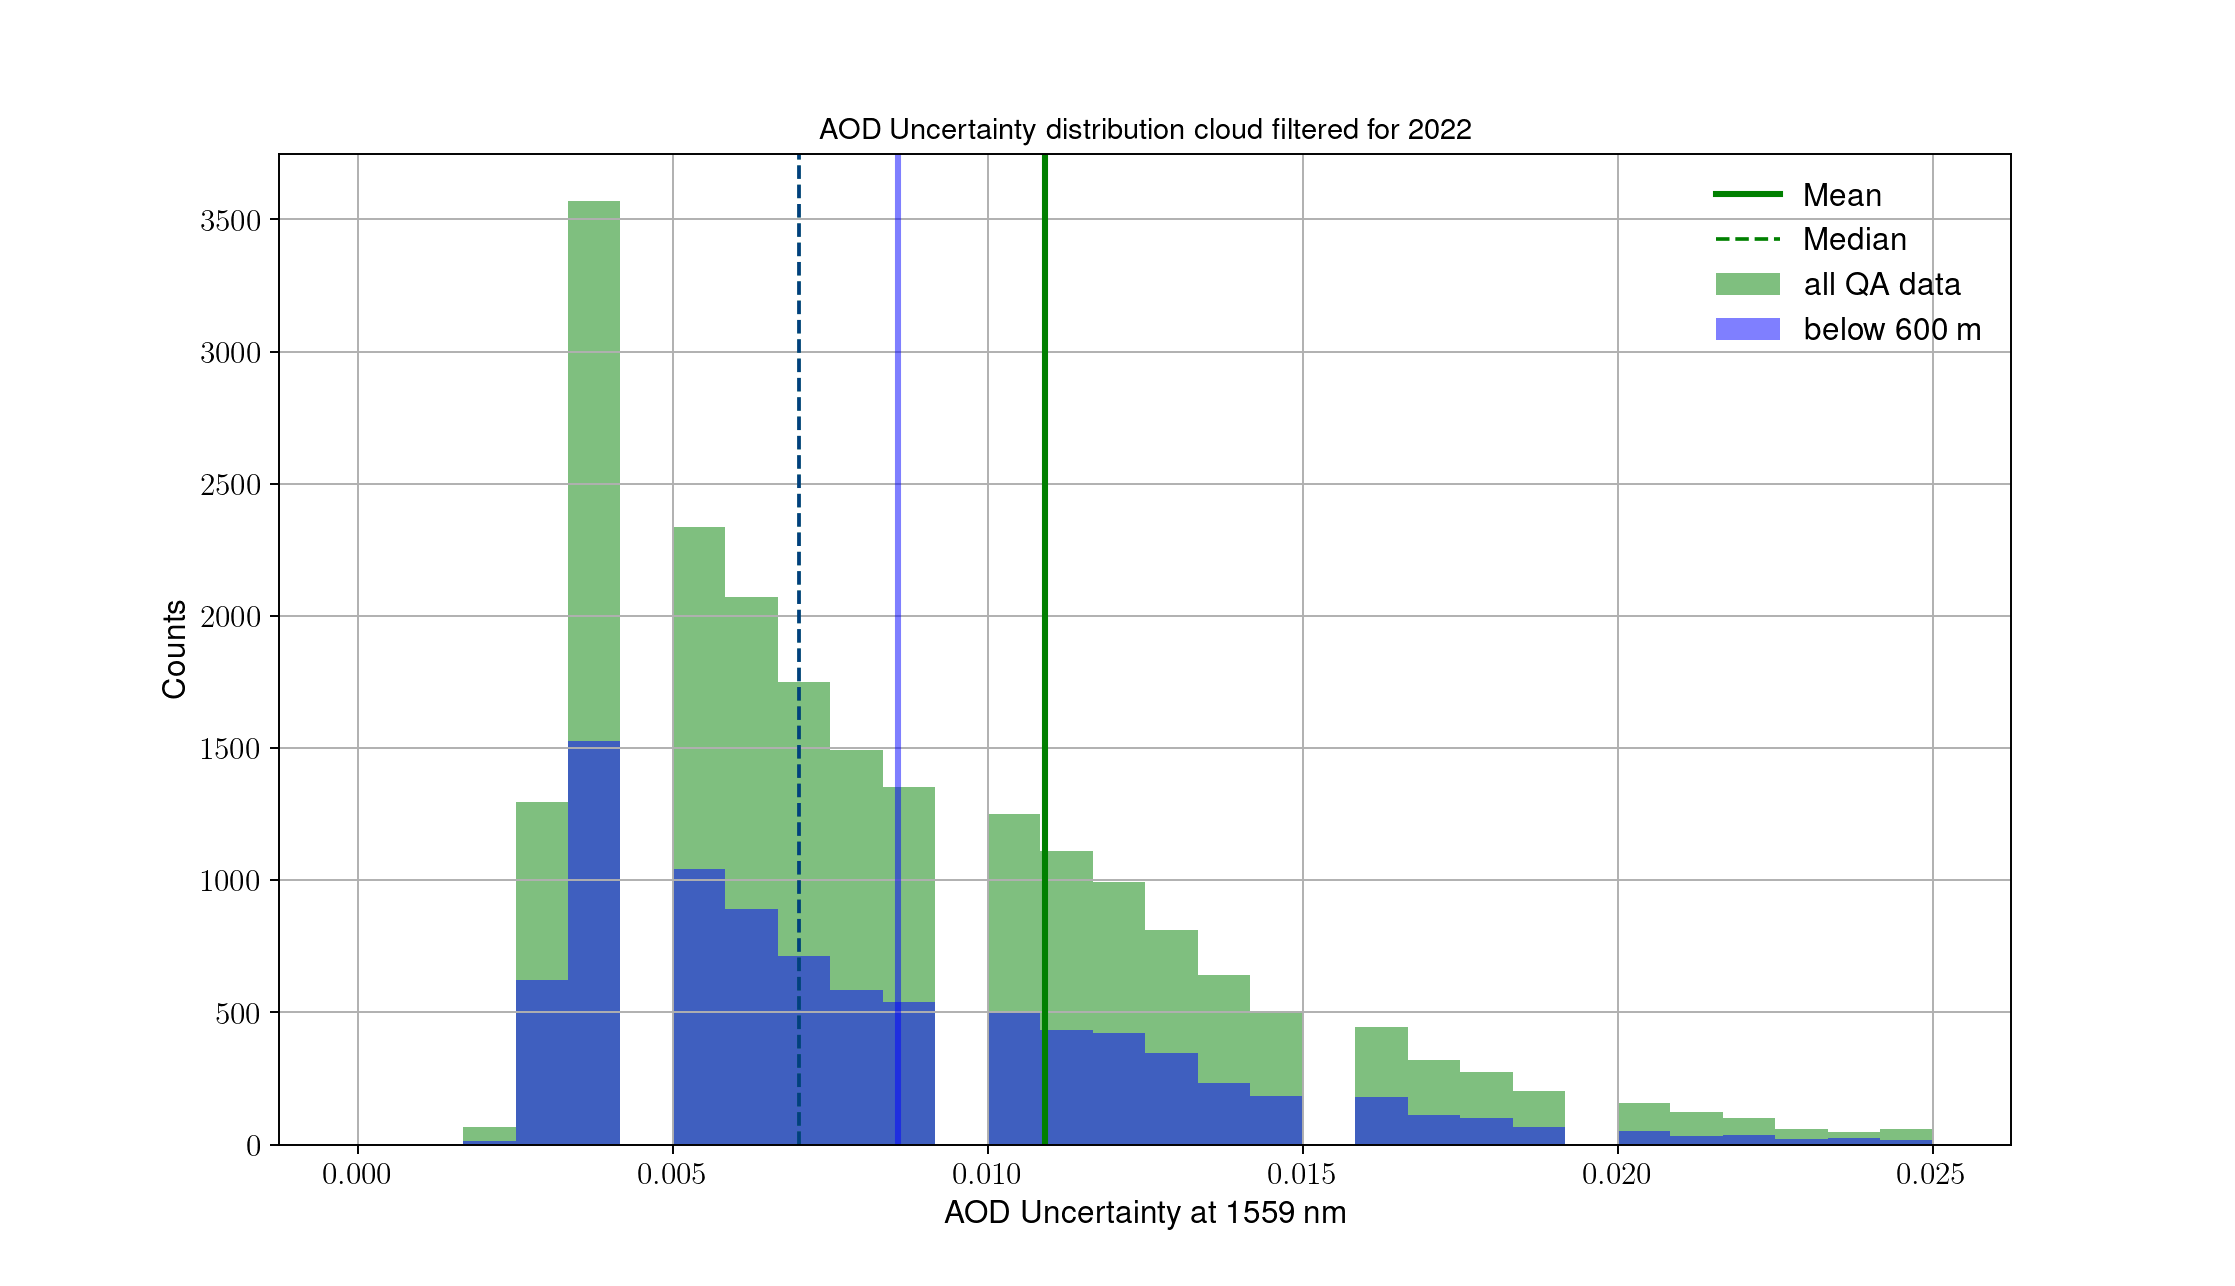

In [95]:
for swvl in ['0380', '0501','0865','1040','1250','1559']:
    plt.figure()
    plt.hist(ar['UNCAOD'+swvl][ar['fl_QA']],bins=30,range=(0,0.025),alpha=0.5,edgecolor='None',color='g',label='all QA data')
    plt.hist(ar['UNCAOD'+swvl][ar['fl1']],bins=30,range=(0,0.025),alpha=0.5,edgecolor='None',color='b',label='below 600 m')
    #plt.hist(ar['AOD0501'][ar['flr']],bins=30,range=(0,1.0),alpha=0.5,normed=False,edgecolor='None',color='y',label='Routine only')
    #plt.hist(ar['AOD0501'][ar['fl2']],bins=30,range=(0,1.0),alpha=0.5,normed=False,edgecolor='None',color='r',label='above 1800 m')
    #plt.yscale('log')
    plt.axvline(x=np.nanmean(ar['UNCAOD'+swvl][ar['fl_QA']]),ls='-',color='g',lw=2.5,label='Mean')
    plt.axvline(x=np.nanmedian(ar['UNCAOD'+swvl][ar['fl_QA']]),ls='--',color='g',label='Median')
    plt.axvline(x=np.nanmean(ar['UNCAOD'+swvl][ar['fl1']]),ls='-',color='b',lw=2.5,alpha=0.5)
    plt.axvline(x=np.nanmedian(ar['UNCAOD'+swvl][ar['fl1']]),ls='--',color='b',alpha=0.5)

    #plt.axvline(x=np.nanmean(ar['AOD0501'][ar['flr']]),ls='-',color='y',lw=2.5)
    #plt.axvline(x=np.nanmedian(ar['AOD0501'][ar['flr']]),ls='--',color='darkkhaki')

    plt.xlabel('AOD Uncertainty at {} nm'.format(swvl))
    plt.ylabel('Counts')
    plt.grid()
    plt.title('AOD Uncertainty distribution cloud filtered for 2022')
    #prelim()
    plt.legend(frameon=False)
    plt.savefig(fp+'plots/AOD_ict_{vv}/SaSa2022_{vv}_UNCAOD{swvl}_histogram.png'.format(vv=vv,swvl=swvl),dpi=600,transparent=True)

# Load the starsuns for getting the uncertainties distribution

In [173]:
import glob
fp_sun = getpath('sunsat')

('Return path named: ', 'sunsat', u'/data/sunsat/')


In [175]:
files6 = glob.glob(fp_sun+'SaSa_2022/data_processed/starsuns/*starsun.mat'.format(vv))
f6s = [f for f in files6 if any(xs in f for xs in days)]
f6s.sort()
f6s

[u'/data/sunsat/SaSa_2022/data_processed/starsuns/4STARB_20220630starsun.mat',
 u'/data/sunsat/SaSa_2022/data_processed/starsuns/4STARB_20220706starsun.mat',
 u'/data/sunsat/SaSa_2022/data_processed/starsuns/4STARB_20220708starsun.mat',
 u'/data/sunsat/SaSa_2022/data_processed/starsuns/4STARB_20220711starsun.mat',
 u'/data/sunsat/SaSa_2022/data_processed/starsuns/4STARB_20220712starsun.mat']

In [176]:
var_names = ['t','tau_aero_noscreening','w','m_aero','tau_aero_err','m_err',
                                      'tau_aero_err1','tau_aero_err2','tau_aero_err3','tau_aero_err4','tau_aero_err5',
                                      'tau_aero_err6','tau_aero_err7','tau_aero_err8','tau_aero_err9','tau_aero_err10','tau_aero_err11']

In [177]:
sp6 = {}
for f in f6s:
    ss = hs.loadmat(f,variable_names=var_names)
    sp6[f.split('_')[-1][0:8]] = ss
    print(f.split('_')[-1][0:8])

20220630
20220706
20220708
20220711
20220712


In [180]:
var_names_1d = ['t','m_aero','m_err']
var_names_wvl = ['tau_aero_err','tau_aero_err1','tau_aero_err2','tau_aero_err3','tau_aero_err4','tau_aero_err5',
                                      'tau_aero_err6','tau_aero_err7','tau_aero_err8','tau_aero_err9','tau_aero_err10','tau_aero_err11']

In [184]:
wvls = [356,380,452,470,501,520,530,532,550,606,620,660,675,706,781,865,1020,1040,1064,1236,1250,1559,1627,1650]
iwvls = [np.argmin(sp6['20220630']['w']-x/1000.0) for x in wvls]

In [187]:
# init
s6 = {}
s6['w'] = sp6['20220630']['w']
for g in var_names_1d: s6[g] = sp6['20220630'][g]
for g in var_names_wvl: s6[g] = sp6['20220630'][g][:,iwvls]
# loop through
for ss in days[1:]:
    print(ss)
    for g in var_names_wvl:
        s6[g] = np.append(s6[g],sp6[ss][g][:,iwvls],axis=0)
    for g in var_names_1d: s6[g] = np.append(s6[g],sp6[ss][g])

20220706
20220708
20220711
20220712


## plot the uncertainties

In [225]:
i380 = 1
i452 = 2
i500 = 4

<IPython.core.display.Javascript object>


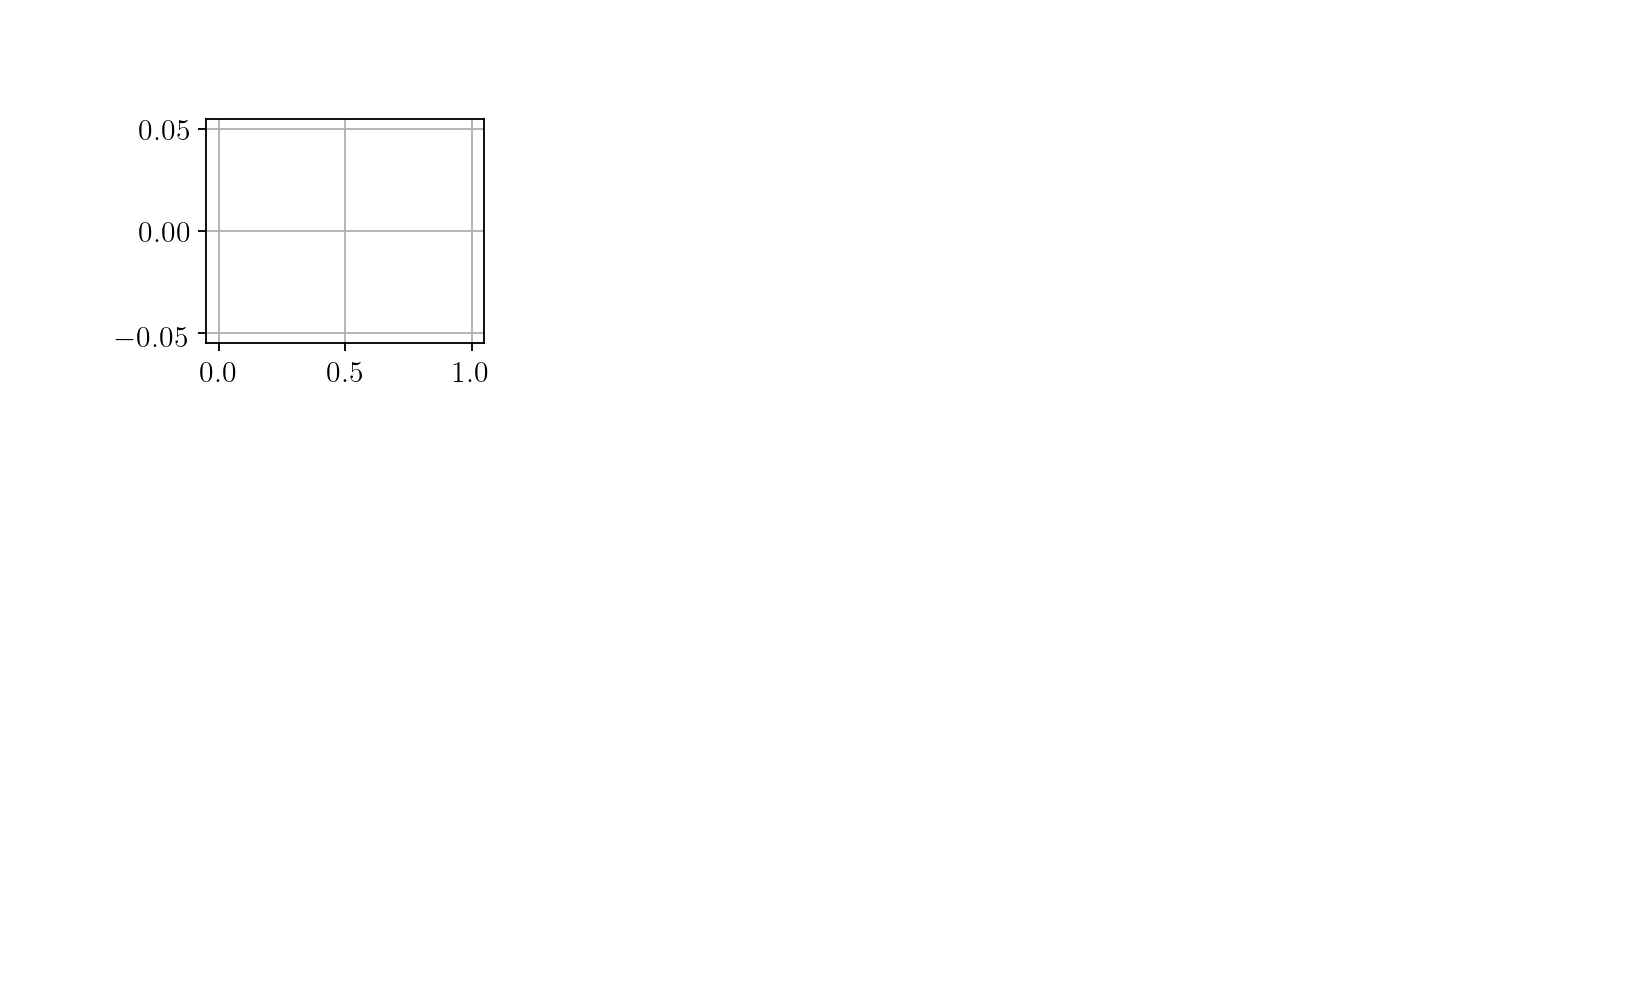

0
1
2
3
4
5


/home/sam/.local/lib/python2.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: Mean of empty slice
  del sys.path[0]


6
7
8
9
10


In [226]:
fig,ax = plt.subplots(3,4,figsize=(10,6))
ax = ax.ravel()
for i in range(11):
    print(i)
    lbl = 'tau_aero_err{:1.0f}'.format(i+1)
    try:
        ig = np.isfinite(s6[lbl][:,i500])
        sss = s6[lbl][ig,i500].astype(float)
    except IndexError:
        sss = s6[lbl].astype(float)
        print('IndexError on {}'.format(i))
    ax[i].hist(sss,bins=30)
    ax[i].axvline(np.nanmean(sss),linestyle='-',label='mean={:1.5f}'.format(np.nanmean(sss)))
    ax[i].axvline(np.nanmedian(sss),linestyle='--',label='median={:1.5f}'.format(np.nanmedian(sss)))
    ax[i].legend(frameon=False)
    ax[i].set_title(lbl)
    ax[i].grid()
#ax[11].axis('off')
#plt.tight_layout()

<IPython.core.display.Javascript object>


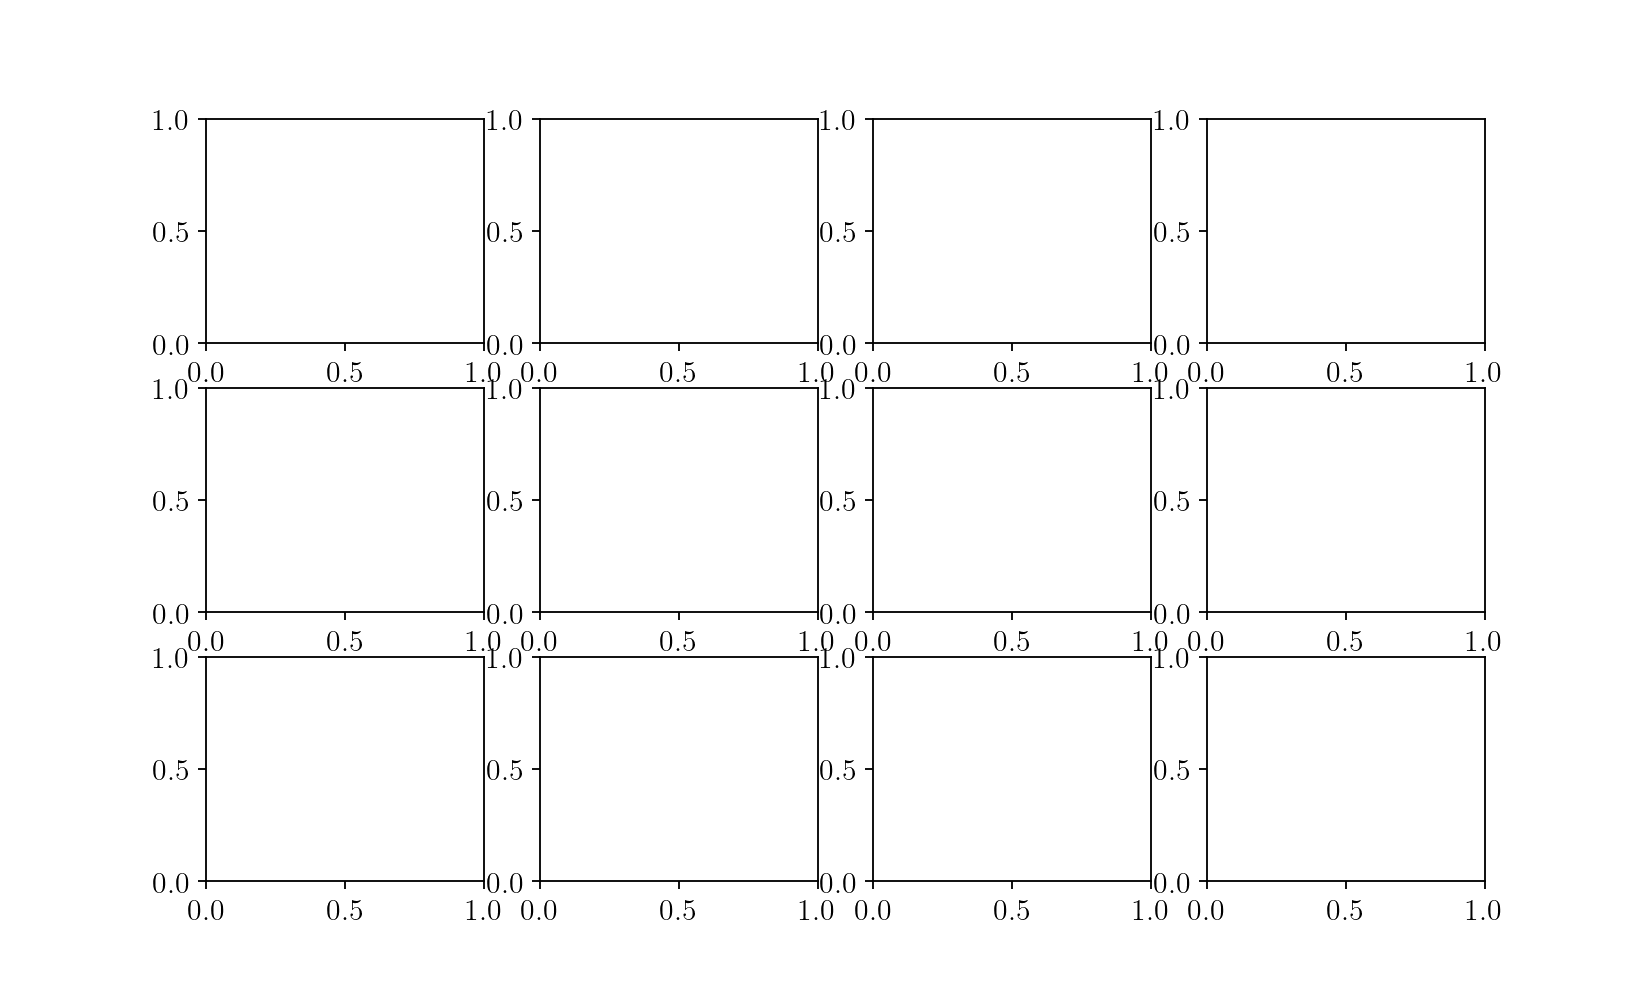

In [213]:
fig,ax = plt.subplots(3,4,figsize=(10,6))

In [214]:
ax.shape

(3, 4)

In [227]:
i=0
lbl = 'tau_aero_err{:1.0f}'.format(i+1)
ig = np.isfinite(s6[lbl][:,i500])
sss = s6[lbl][ig,i500].astype(float)
print(sss.min(),sss.max())

ValueError: zero-size array to reduction operation minimum which has no identity

In [224]:
s6[lbl][ig,i380]

array([], dtype=float32)

<IPython.core.display.Javascript object>


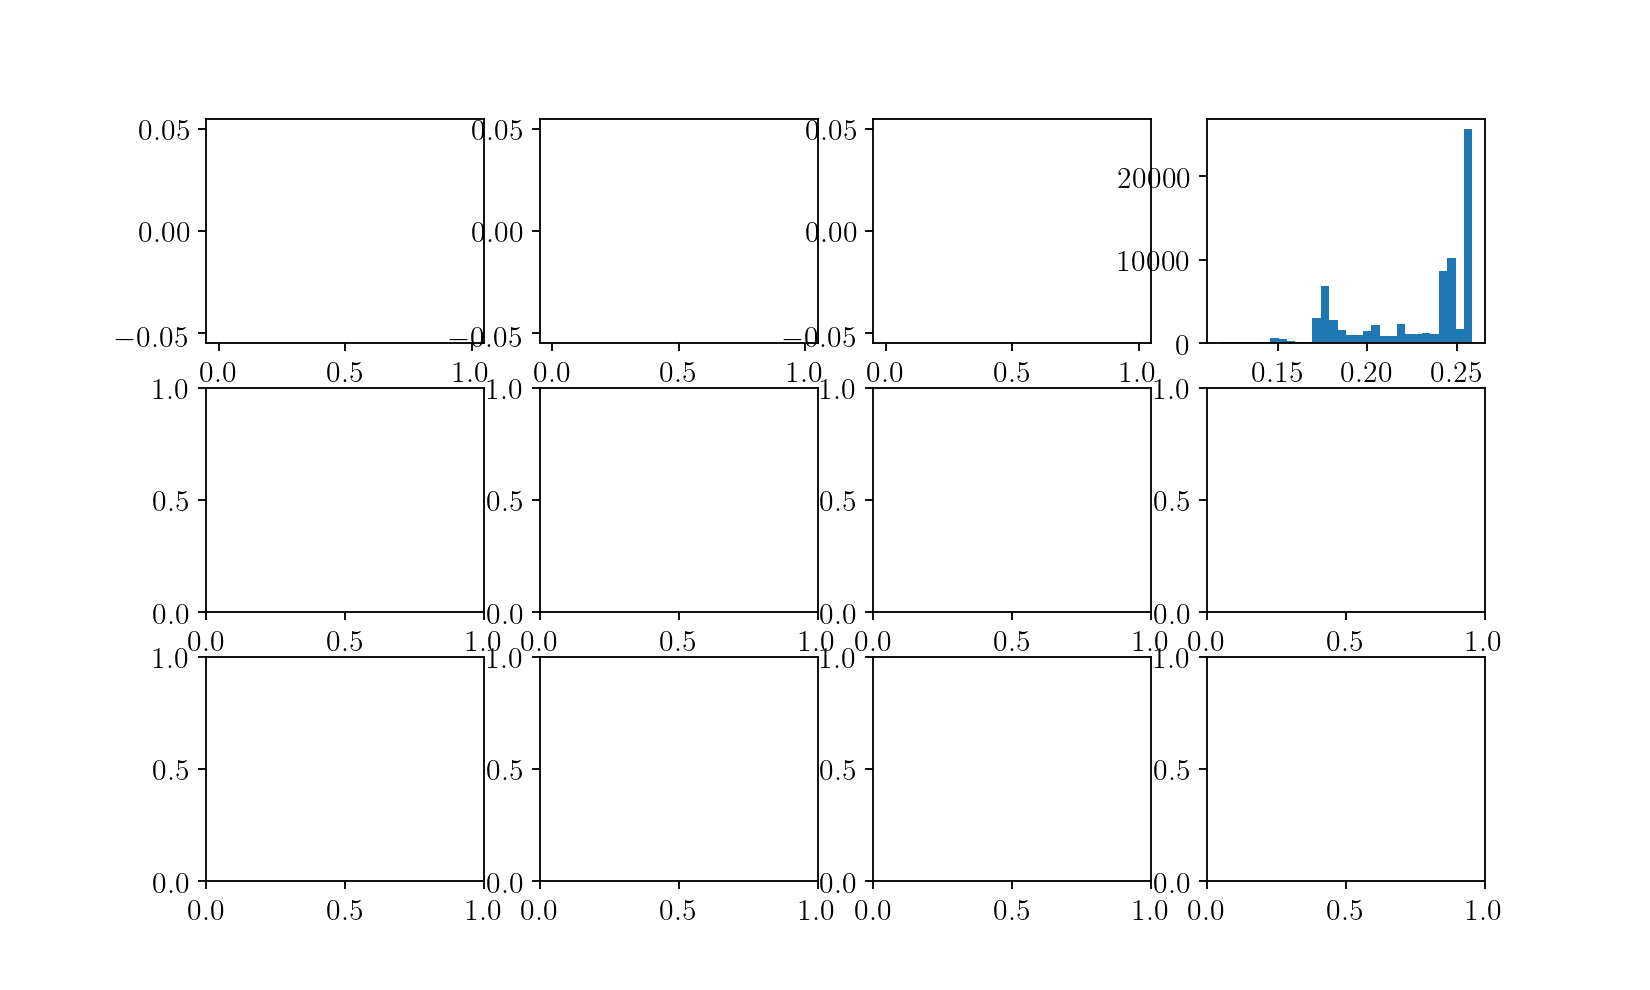

(array([  152.,    97.,    91.,    94.,    91.,   111.,   572.,   503.,
          256.,   156.,   144.,  3006.,  6815.,  2798.,  1605.,   999.,
          940.,  1411.,  2203.,   851.,   881.,  2245.,  1030.,  1106.,
         1221.,  1110.,  8601., 10175.,  1684., 25617.]),
 array([0.11765894, 0.12235992, 0.12706089, 0.13176186, 0.13646284,
        0.14116381, 0.14586478, 0.15056576, 0.15526673, 0.15996771,
        0.16466868, 0.16936965, 0.17407063, 0.1787716 , 0.18347257,
        0.18817355, 0.19287452, 0.19757549, 0.20227647, 0.20697744,
        0.21167842, 0.21637939, 0.22108036, 0.22578134, 0.23048231,
        0.23518328, 0.23988426, 0.24458523, 0.2492862 , 0.25398718,
        0.25868815]),
 <a list of 30 Patch objects>)

In [216]:
fig,ax = plt.subplots(3,4,figsize=(10,6))
#ax = ax.ravel()

i=0
lbl = 'tau_aero_err{:1.0f}'.format(i+1)
ig = np.isfinite(s6[lbl][:,i380])
sss = s6[lbl][ig,i380].astype(float)
ax[0,i].hist(sss,bins=30)

i=1
lbl = 'tau_aero_err{:1.0f}'.format(i+1)
ig = np.isfinite(s6[lbl][:,i380])
sss = s6[lbl][ig,i380].astype(float)
ax[0,i].hist(sss,bins=30)

i=2
lbl = 'tau_aero_err{:1.0f}'.format(i+1)
ig = np.isfinite(s6[lbl][:,i380])
sss = s6[lbl][ig,i380].astype(float)
ax[0,i].hist(sss,bins=30)

i=3
lbl = 'tau_aero_err{:1.0f}'.format(i+1)
ig = np.isfinite(s6[lbl][:,i380])
sss = s6[lbl][ig,i380].astype(float)
ax[0,i].hist(sss,bins=30)




